# Time Series Analysis of China Post Business Volume
#### Seasonal ARIMA model with R 
#### Nov 2020, slightly modified

## 1. Describe the dataset

http://www.spb.gov.cn/ (State Post Bureau of The People's Republic of China)

The dataset describes monthly postal delivery quantity (Unit: 10k), from November 2008 to October 2020, a total of 144 pieces of data in 12 years. I made the model used the data from November 2008 to October 2019 (132 entries), and used the data from November 2019 to October 2020 (last 12 entries) to evaluate my prediction with the model.

#### Variables:
- Time: The time (month) of the record.
- Count: Postal delivery quantity in this month.

#### Target: 
- Courier quantity is an indicator that is closely related to many factors in life. Under the influence of large-scale online shopping promotions in China such as "Double Eleven"(11.11) and "Double Twelve"(12.12), the Spring Festival holiday, and students' winter and summer vacations, will there be periodic changes in the number of express delivery? 
- In addition to these relatively clear and direct influencing factors, the overall domestic environment at different times will inevitably have a certain impact on it. In particular, the sudden outbreak of COVID-19 in early 2020 still affects our lives to a certain extent today, and all industries have been impacted and affected. Under this special background, can our data also reflect some information about this special period from the side?   
- Therefore, The main problem that the analysis wants to explore is: **Whether the number of express delivery changes with time has a certain pattern?**


## 2. Load the dataset

In [1]:
options(repr.plot.width =8, repr.plot.height = 6)

In [2]:
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
df<-read.csv("data2.csv",sep=",")
head(df,3)

,Month,Count
,<chr>,<dbl>
1,08-Nov,13236.4
2,08-Dec,15168.2
3,09-Jan,10971.8


In [4]:
nrow(df)

[1] 144

In [5]:
df_pre<-tail(df,12) #data used for prediction
df<-head(df,132)#data used for modelling

In [6]:
#convert the data into time series data
mailseries<-ts(df$Count,frequency=12,start=c(2008,11))
mailseries

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,,,,,,,,,,,13236.4,15168.2
2009,10971.8,11781.0,15292.7,14593.4,14829.1,15714.1,16273.1,16850.4,17791.9,14853.5,17534.8,19299.0
2010,17065.7,11147.1,19083.3,18193.8,18661.1,19438.0,19308.2,19710.6,21535.3,20162.9,23220.0,26366.2
2011,25301.6,17177.4,28645.4,28015.0,29113.8,30078.4,29599.0,31235.6,32462.6,33414.7,39393.8,42873.8
2012,27319.4,35164.2,41850.9,40373.8,48993.9,45447.6,46244.9,46561.8,51345.3,52421.3,67126.6,65698.4
2013,68917.7,35473.1,67043.8,66249.4,74178.7,72154.1,74802.1,75266.7,83637.1,85303.5,108703.4,106945.3
2014,88950.0,68886.2,102528.2,105417.5,111634.7,112926.3,111245.1,114050.7,122992.0,128997.1,164616.4,163681.1
2015,144570.4,81779.5,142537.8,151483.9,161002.5,164486.7,163988.3,169020.3,191336.9,194064.8,260537.8,241828.0
2016,215505.3,124618.3,236922.2,237303.2,253108.3,257633.1,249640.6,252296.1,282685.9,302614.2,376447.9,339540.0
2017,221113.6,234430.1,303493.7,298237.0,334061.8,340451.7,320498.9,326398.6,360605.6,374771.5,471490.3,420037.7


In [7]:
#data used for modelling

## 3. Exploration and initial thoughts

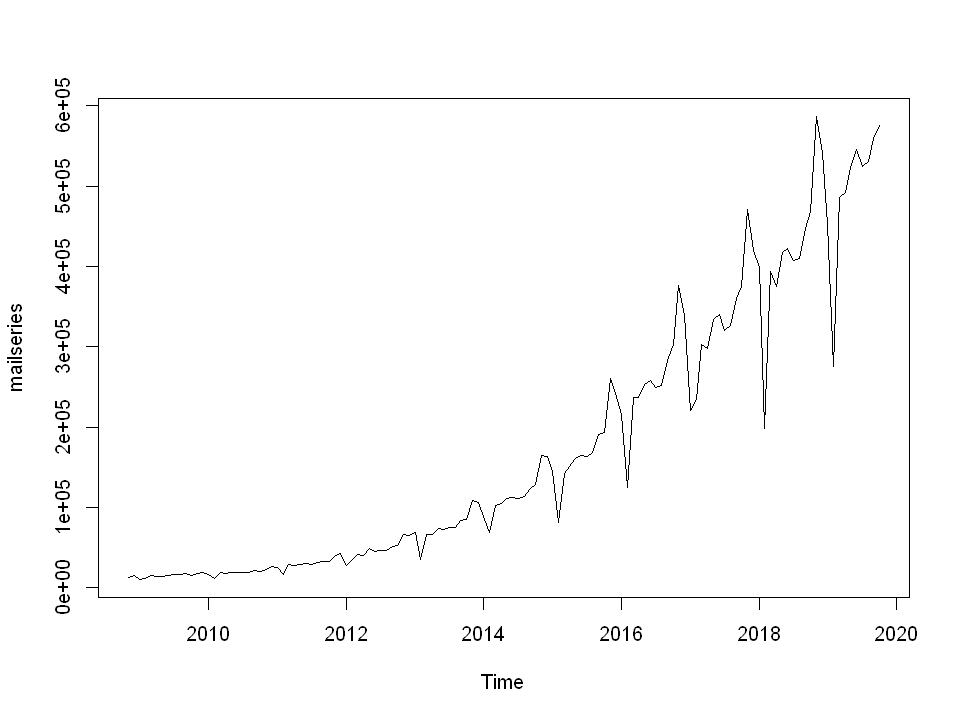

In [8]:
#Time Series plot
plot(mailseries)

First, draw a time series plot of the data. 
- The data itself is **not stationary** (if it is stationary, the trend line should fluctuate around a certain horizontal line.)
- It can be seen that the data obviously has a **growing** trend, and this trend looks like a **quadratic** trend.
- At the same time, it has a very obvious **periodicity**.
- The **heteroscedasticity** is obvious - the variance is increasing. 

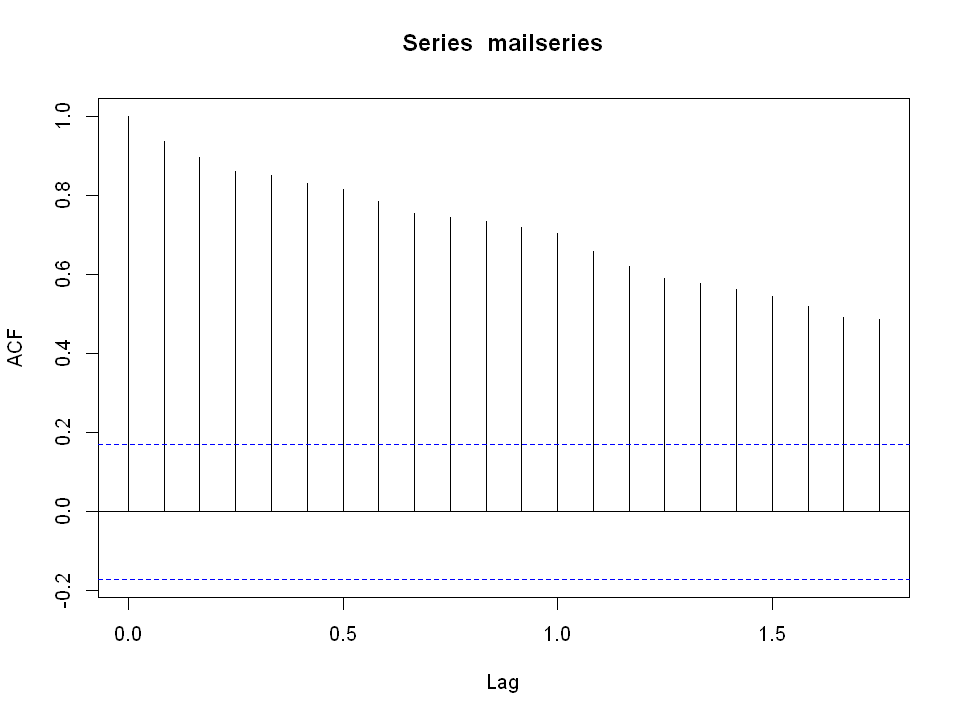

In [9]:
#ACF Plot
acf(mailseries)

The **nonstationarity** of the data is also confirmed by the slow decline of the ACF graph. (If it is stationary, the ACF should rapidly decrease to 0)

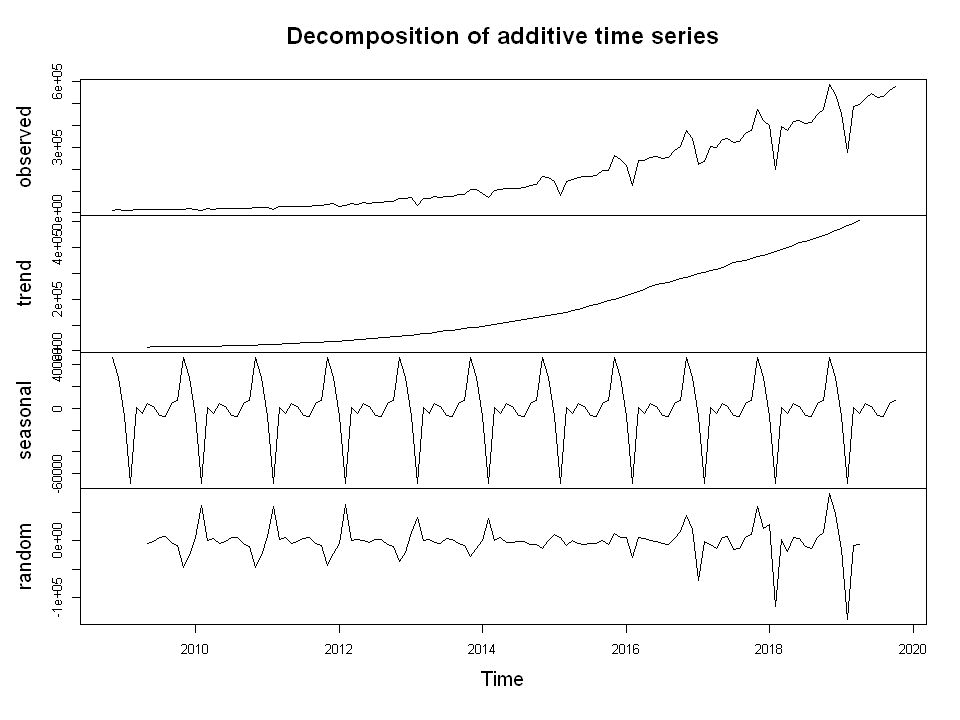

In [10]:
#Plot the decomposition of time series
plot(decompose(mailseries))

The decomposition further verifies our previous judgment on the data has **obvious heteroscedasticity, quadratic trend and periodicity**. Especially, **the periodicity is very regular**. 

## 4. Modelling

### Detrending

We first solve the problem that the obvious trend of the data is not stable by carrying out the **detrending** operation. Since the trend is clearly a quadratic pattern, I try to **estimate the trend using quadratic regression**. 

In [11]:
#quadratic regression
t=1:132
t2=t^2
fit1=lm(mailseries~t+t2)
summary(fit1)


Call:
lm(formula = mailseries ~ t + t2)

Residuals:
    Min      1Q  Median      3Q     Max 
-208187   -6678    1329    8537  128354 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27339.888   9656.349   2.831  0.00538 ** 
t           -1468.583    335.188  -4.381 2.42e-05 ***
t2             41.552      2.441  17.020  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 36420 on 129 degrees of freedom
Multiple R-squared:  0.9539,	Adjusted R-squared:  0.9532 
F-statistic:  1334 on 2 and 129 DF,  p-value: < 2.2e-16


Fitted a quadratic regression model, we can see that the effect of the model is still good. The adjusted R-square is above 95%. In addition, the p-values of each coefficient, t and t2, is very small, which means they are very significant. And the p-values of the model F test are very small, therefore, the regression model captures the trend of the model well. 

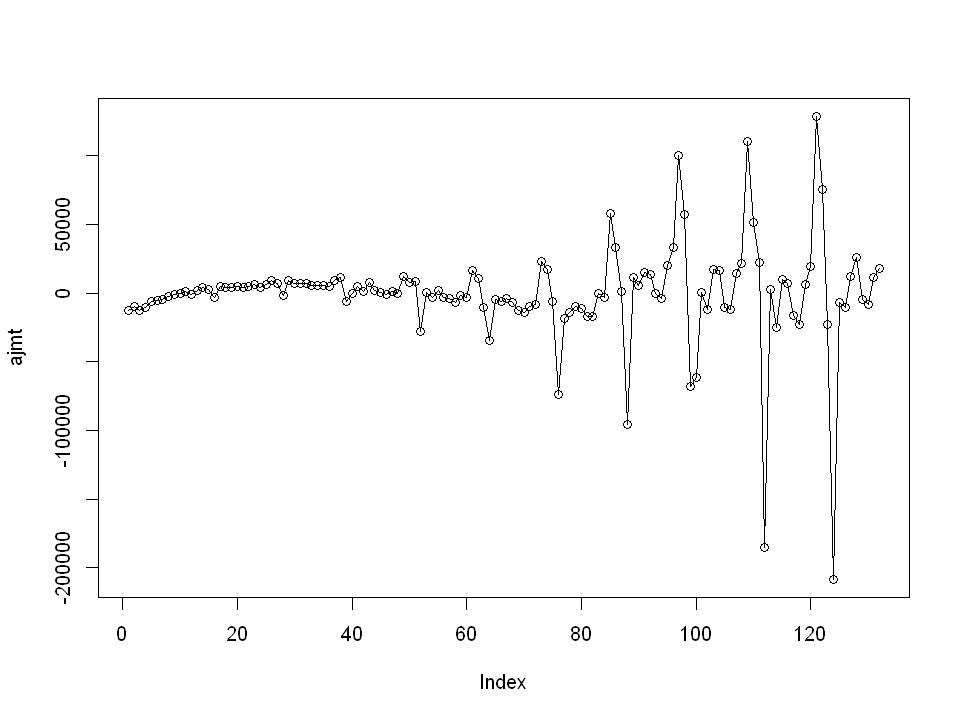

In [12]:
#The fit line
fitline<--1468.583*t+41.552*t2+27339.888
#Residuals
ajmt=fit1$residuals

#Plot the residual series after detrending
plot(ajmt,type="o")

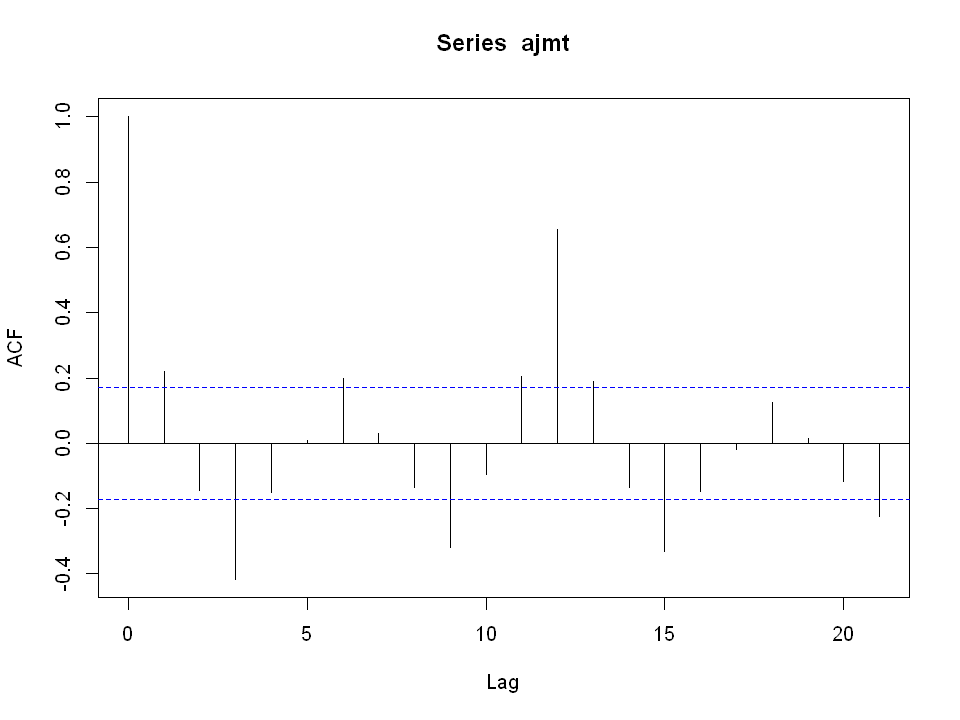

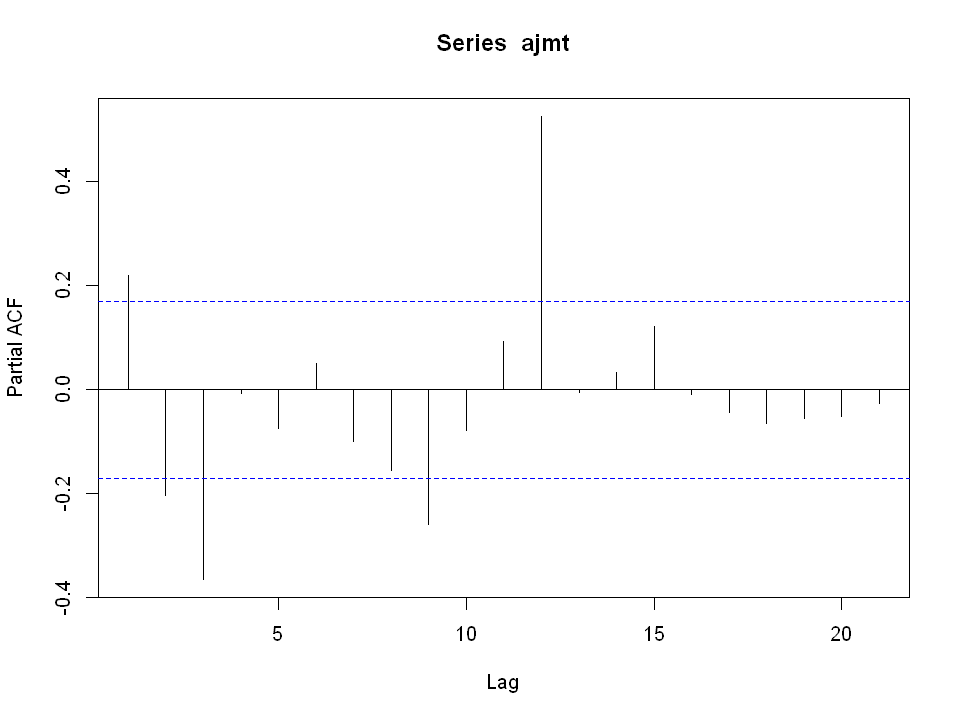

In [13]:
#Plot the acf and pacf of the residual
acf(ajmt)
pacf(ajmt)

The residual series is still not stationary, and from the series plot we can see that the variance is increasing(not stationary). Also, some kind of periodicity pattern in the ACF plot(interval is 6)... So the first thing we need to do is eliminate heteroscedasticity.

### Eliminate heteroscedasticity: Variance-stabilizing transformation 

The first approach is logarithmic transformation, but from the plot below, the variance is still not stable.

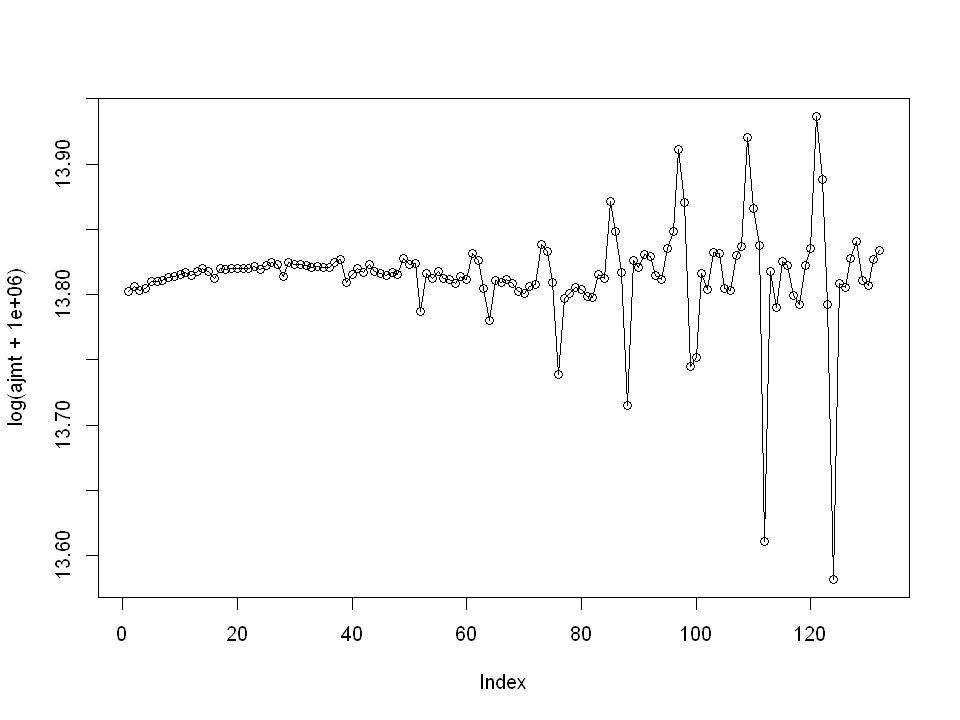

In [14]:
plot(log(ajmt+1000000),type="o")

Then I did a box-cox transformation. And the variance gets more stable now.

Warning message in guerrero(x, lower, upper):
"Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data."


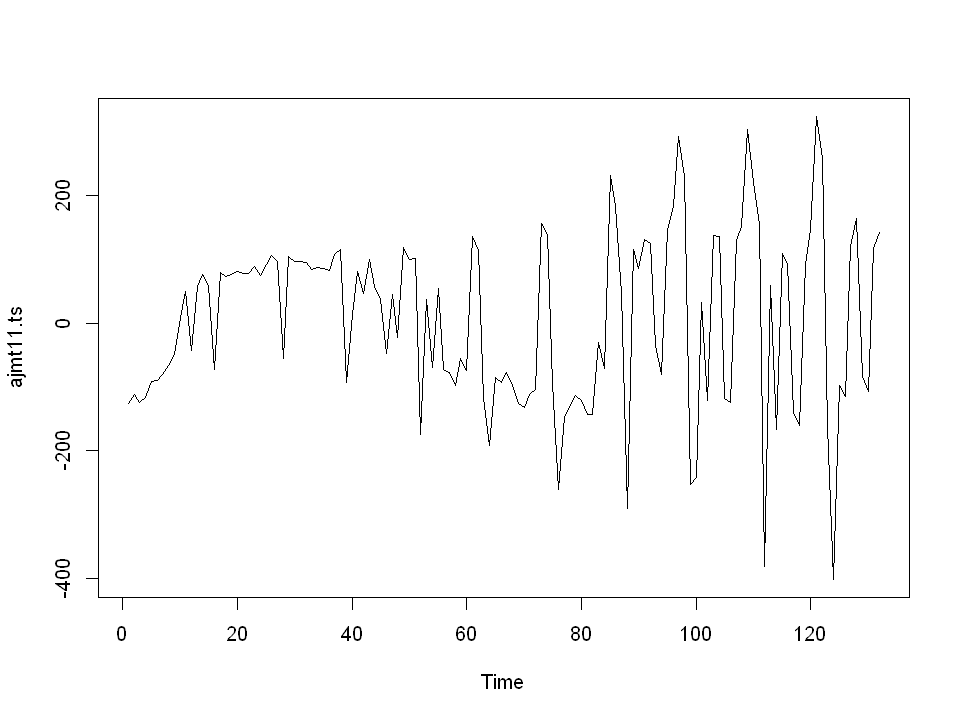

In [15]:
library(forecast)
best_lambda=forecast::BoxCox.lambda(ajmt)#0.4176
ajmt11=forecast::BoxCox(ajmt,lambda=best_lambda)
ajmt11.ts=ts(ajmt11)
plot(ajmt11.ts)

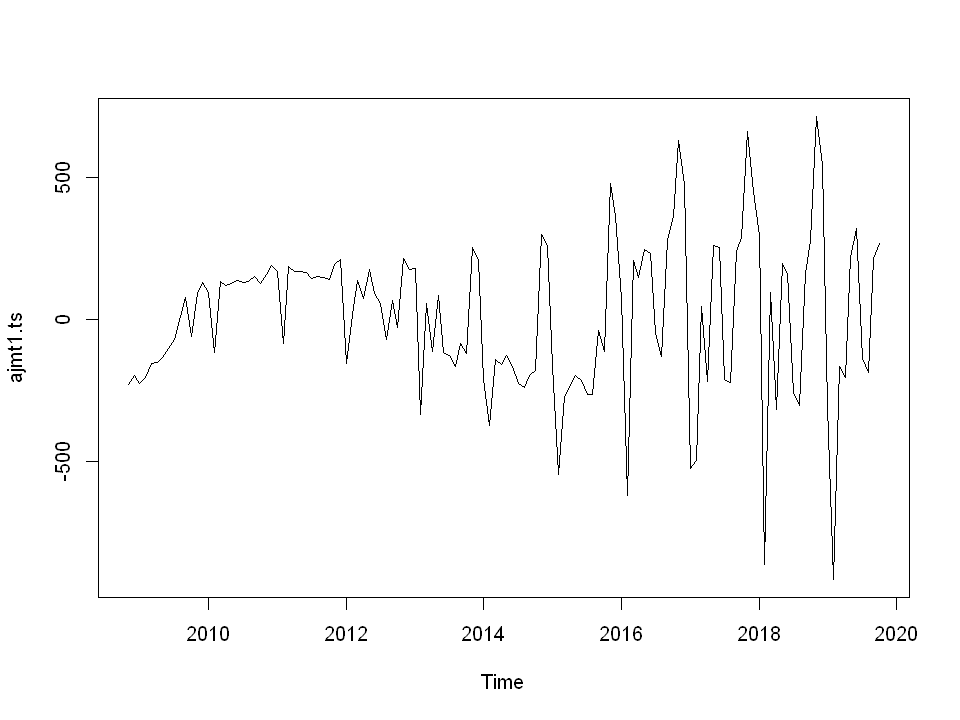

In [16]:
#For easier explanation, use lambda=0.5
ajmt1=forecast::BoxCox(ajmt,lambda=0.5)
#convert the data into time series data
ajmt1.ts=ts(ajmt1,frequency=12,start=c(2008,11))
plot(ajmt1.ts)

Perform stationarity analysis on the series after variance-stabilizing transformation. The ACF decreases slowly, and the augmented Dickey-Fuller test shows non-stationary, so it can be considered non-stationary and needs to be adjusted by **difference**. 


	Augmented Dickey-Fuller Test

data:  ajmt1
Dickey-Fuller = -3.1546, Lag order = 5, p-value = 0.09854
alternative hypothesis: stationary


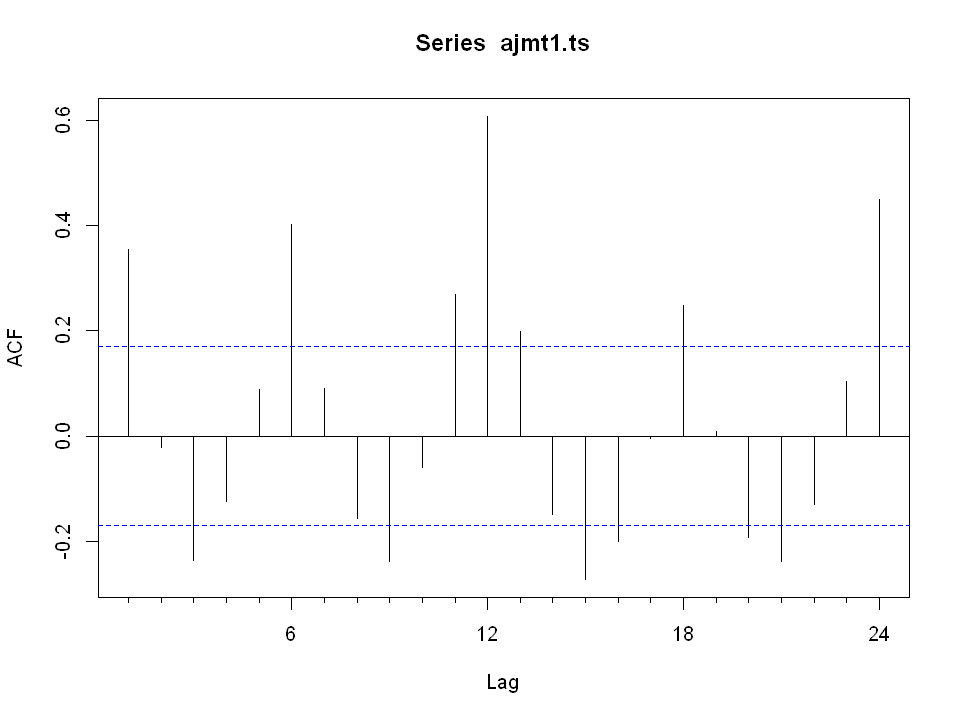

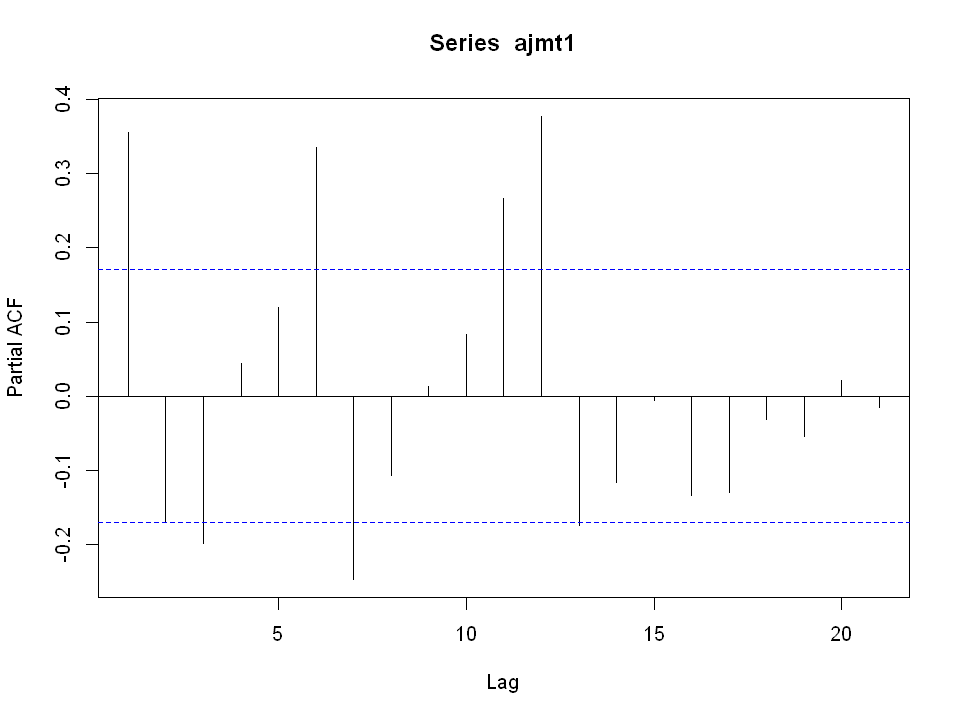

In [17]:
Acf(ajmt1.ts)
adf.test(ajmt1)
pacf(ajmt1)

In addition, there is a very obvious periodicity with respect to ACF, and s=6. The ACF which order is a multiple of 6 also decreases slowly, indicating both **non-stationarity and seasonal non-stationarity**. Considering both short-term and long-term effects, we can introduce a seasonal multiplication model. 

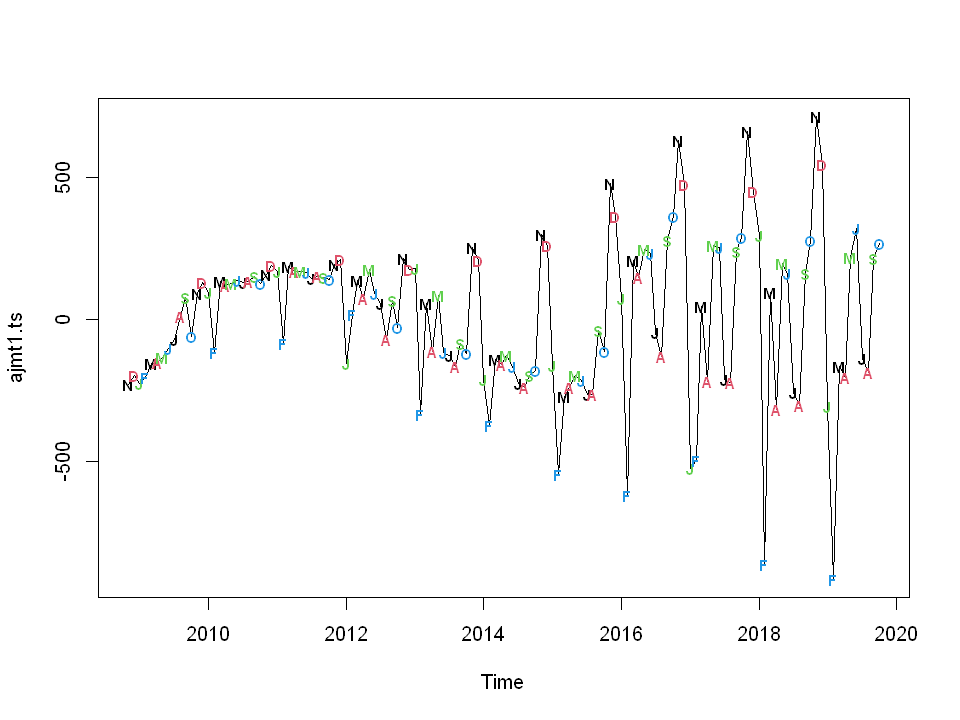

In [18]:
#Check the seasonal periodicity 
plot(ajmt1.ts)
Month=c("N","D","J","F","M","A","M","J","J","A","S","O")
points(ajmt1.ts,pch=Month,cex=0.75,font=2,col=1:4)

I plotted a series periodicity plot to look further into the periodicity cycle. May (M) and November (N) are peaks, February (F) and August (A) are valleys. It is further confirmed that s=6, taking half a year as a cycle.

### Get trend stationarity and seasonal stationarity by difference 

#### First-order difference - get trend stationarity

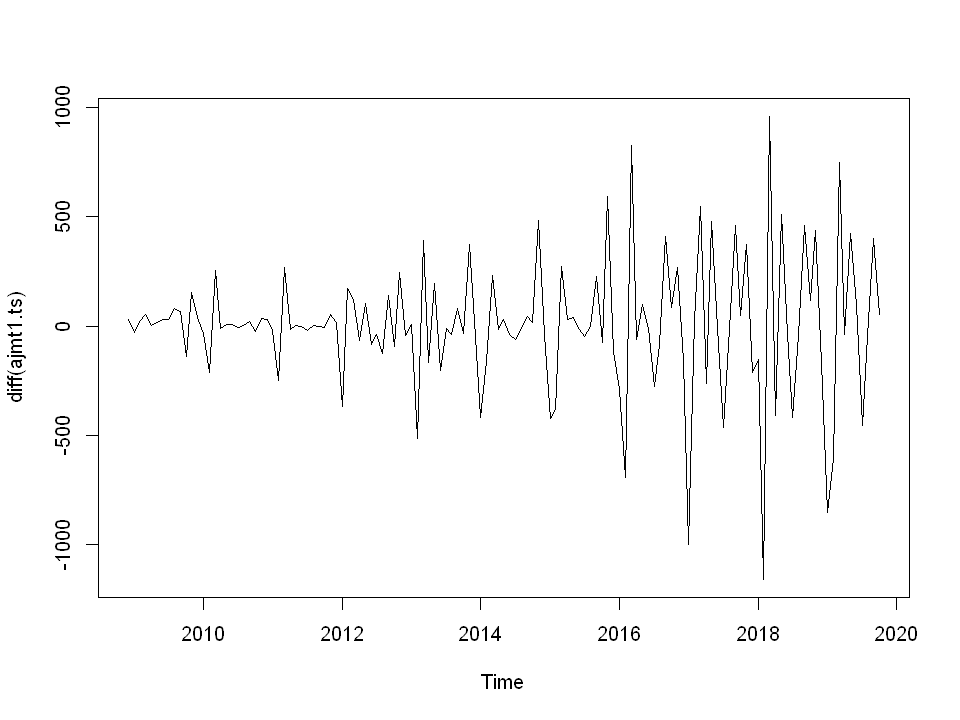

Warning message in adf.test(diff(ajmt1.ts)[-1]):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  diff(ajmt1.ts)[-1]
Dickey-Fuller = -6.6293, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


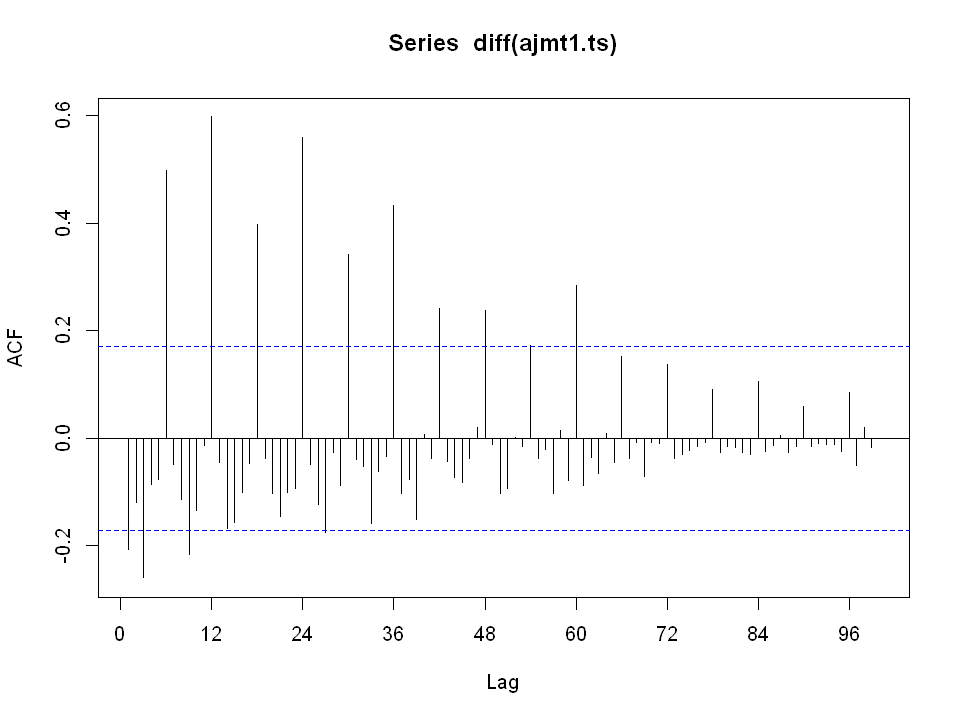

In [19]:
plot(diff(ajmt1.ts))
Acf(diff(ajmt1.ts),lag.max=100)
adf.test(diff(ajmt1.ts)[-1])

Looking at the time series plot, the first-order difference smooths out the hidden (curve) trend of the model. The ADF test shows the data obtains stationarity. The ACF of non-seasonal order drops within the interval rapidly. - The data gets trend stationarity.

From the ACF plot above, it can be seen that ACF values of orders that are multiples of period 6 are big and decay slowly, indicating that periodic differencing is also required to obtain seasonal stationarity. 

#### First-order seasonal difference - get trend stationarity

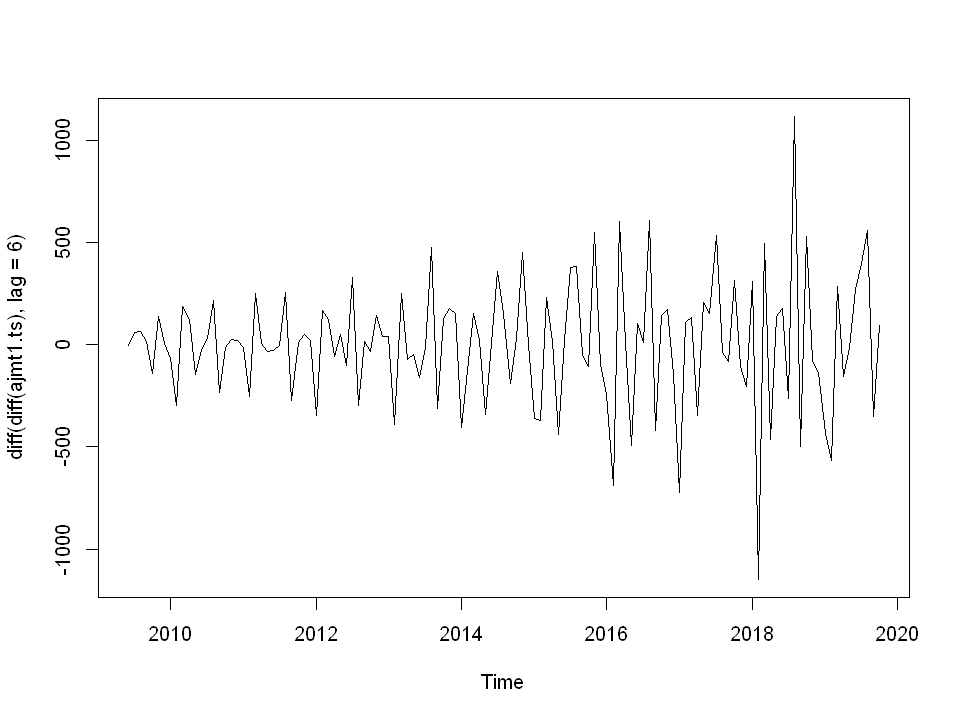

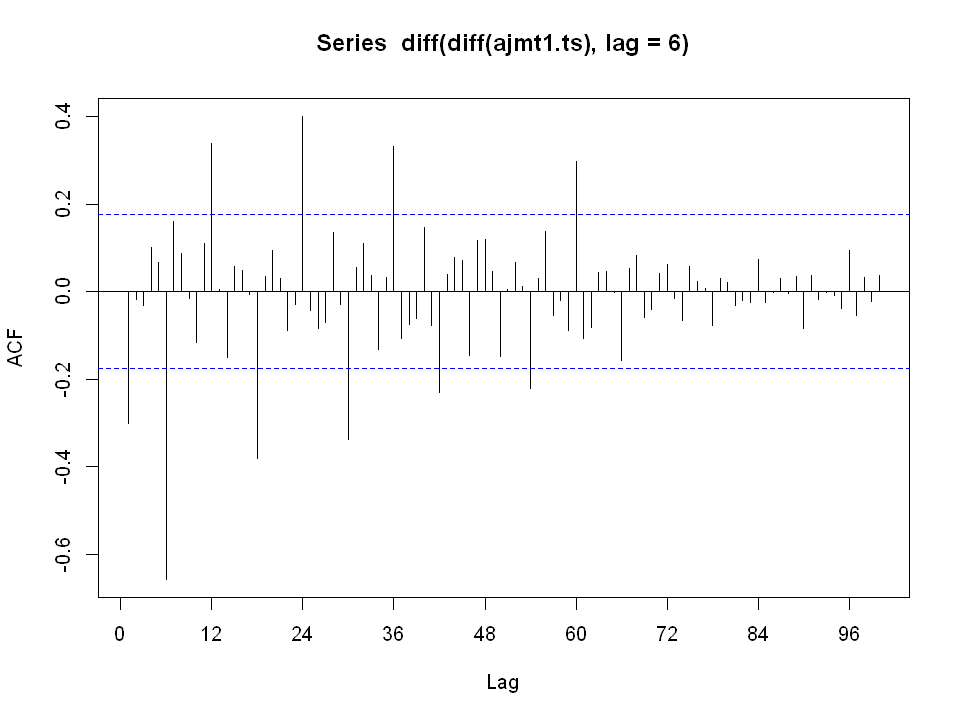

In [20]:
plot(diff(diff(ajmt1.ts),lag=6))
Acf(diff(diff(ajmt1.ts),lag=6),lag.max=100)

After the first-order seasonal difference, the period multiple ACF decays rapidly into the confidence band, and the data time series graph is also very stable. 

## 5. Set up the model

Now that we get a relatively stabilized series, we can determine the order of AR and MA by looking at the ACF and PACF plots of the series. 

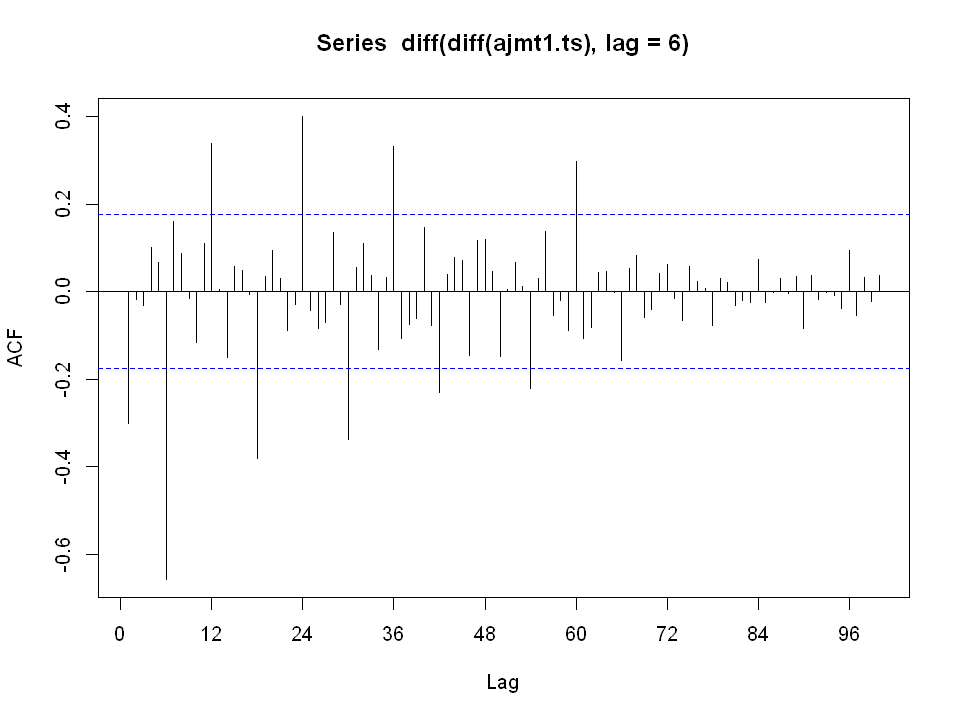

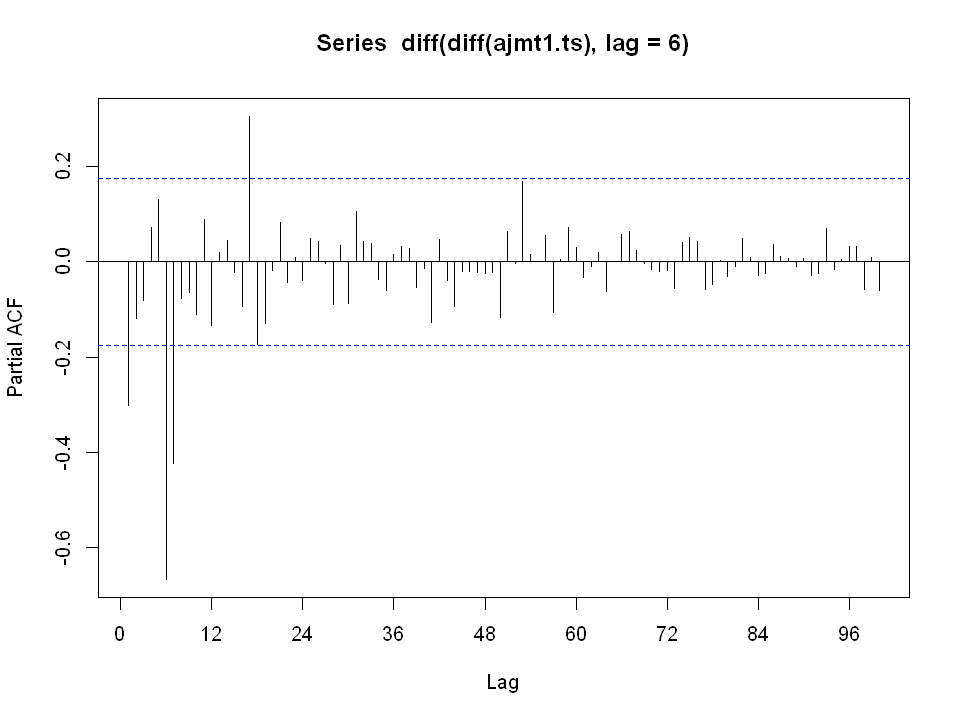

In [21]:
Acf(diff(diff(ajmt1.ts),lag=6),lag.max=100)
Pacf(diff(diff(ajmt1.ts),lag=6),lag.max=100)

First look at the first few *non-seasonal* orders. ACF truncates for lags > 1, PACF tails off, consider MA(1).  
Secondly, for the *seasonal* orders, ACF tails off. PACF at orders 1 and 3 are above the confidence band, PACF at order 2 is within the confidence band, so AR(3) and AR(1) can be considered. 

#### (1) First attempt: **SARIMA(0,1,1)×(1,1,0)6**

In [22]:
m1.ajmt=Arima(ajmt1.ts,order=c(0,1,1),seasonal=list(order=c(1,1,0),period=6),method="ML")
m1.ajmt

Series: ajmt1.ts 
ARIMA(0,1,1)(1,1,0)[6] 

Coefficients:
          ma1     sar1
      -0.7303  -0.8103
s.e.   0.0749   0.0507

sigma^2 = 32035:  log likelihood = -828.47
AIC=1662.95   AICc=1663.15   BIC=1671.43

The model coefficients are very significant, with an AIC value of 1662.95.

#### Model diagnosis 

Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast


Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar




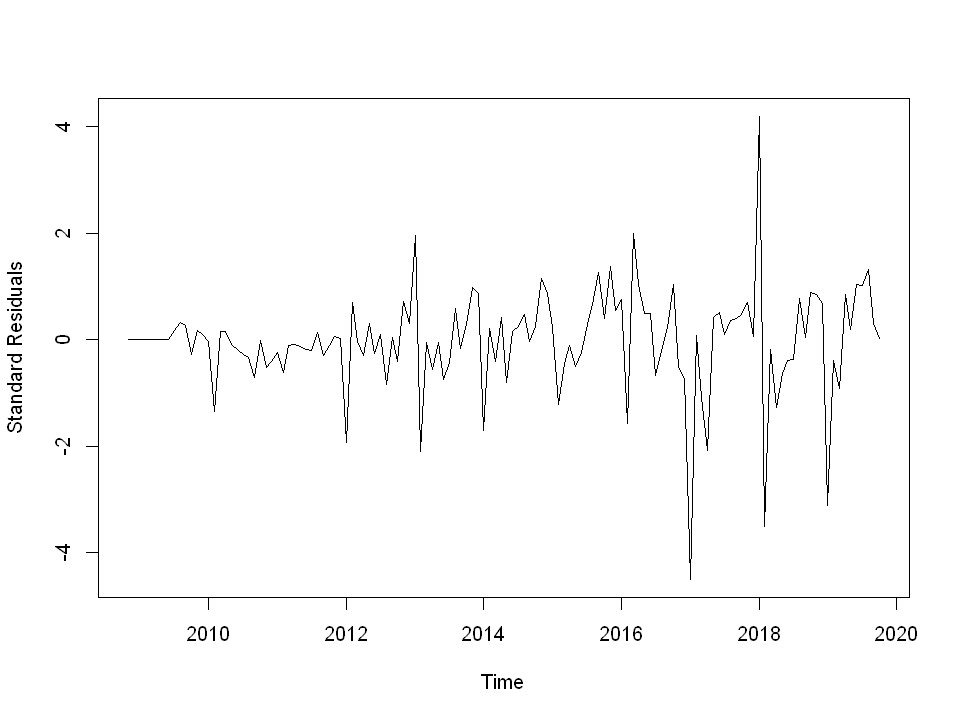

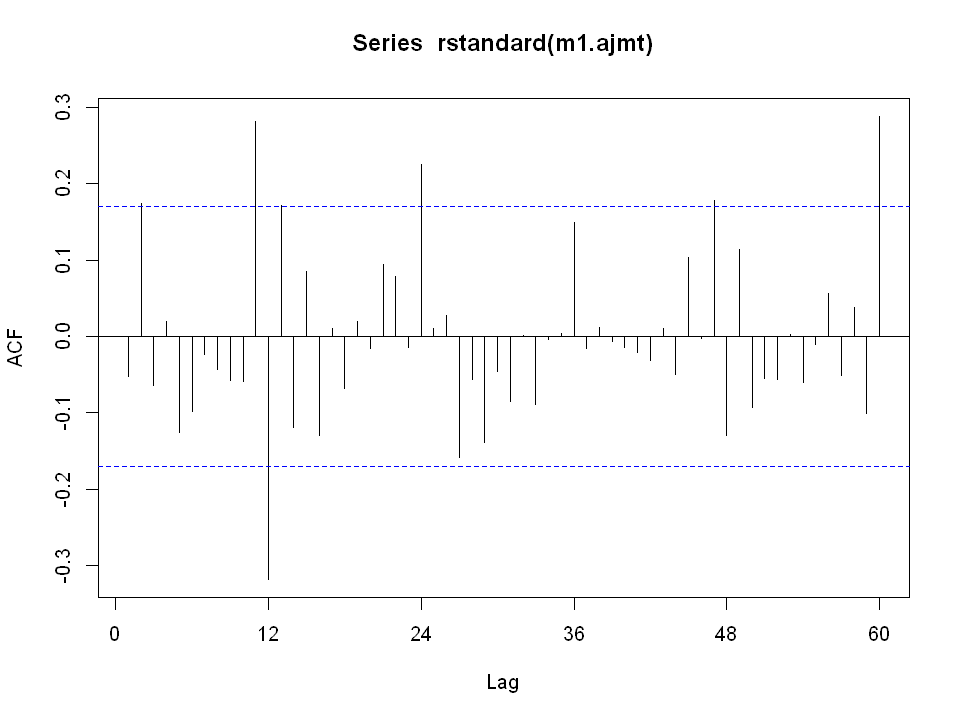

In [23]:
#check the residuals...
library(TSA)
plot(rstandard(m1.ajmt),ylab="Standard Residuals")
Acf(rstandard(m1.ajmt),lag.max=60)

The ACF of the model residuals decays slowly, In addition, the time series plot shows that the residuals are not stable. 

In [24]:
#check if residuals are correlated 

#Durbin Watson (DW) statistic - (only first-order correlation)
dw=sum(diff(rstandard(m1.ajmt))^2)/sum(rstandard(m1.ajmt)^2)
dw

[1] 2.103628

Its value is close to 2, the model residuals have no significant first-order autocorrelation. 

In [25]:
##Ljung-Box statistic
for(i in 1:3)
  print(Box.test(rstandard(m1.ajmt),type = c("Ljung-Box"),lag=6*i))
#rstandard: standardized residuals 


	Box-Ljung test

data:  rstandard(m1.ajmt)
X-squared = 8.6949, df = 6, p-value = 0.1915


	Box-Ljung test

data:  rstandard(m1.ajmt)
X-squared = 36.457, df = 12, p-value = 0.0002735


	Box-Ljung test

data:  rstandard(m1.ajmt)
X-squared = 47.316, df = 18, p-value = 0.0001902



LB statistic test shows for higher orders, the p-value is very small, which means residuals have high-order correlations.

#### (2) Try the other model: **SARIMA(0,1,1)×(3,1,0)6**

In [26]:
m2.ajmt=Arima(ajmt1.ts,order=c(0,1,1),seasonal=list(order=c(3,1,0),period=6),method="ML")
m2.ajmt

Series: ajmt1.ts 
ARIMA(0,1,1)(3,1,0)[6] 

Coefficients:
          ma1     sar1     sar2     sar3
      -0.6653  -0.9041  -0.4830  -0.4778
s.e.   0.0789   0.0781   0.1069   0.0819

sigma^2 = 25080:  log likelihood = -814.5
AIC=1639.01   AICc=1639.51   BIC=1653.15

The coefficients are all significantly non-zero, the # of coefficients increased, and the AIC is similar to the previous one. 

#### Model diagnosis 

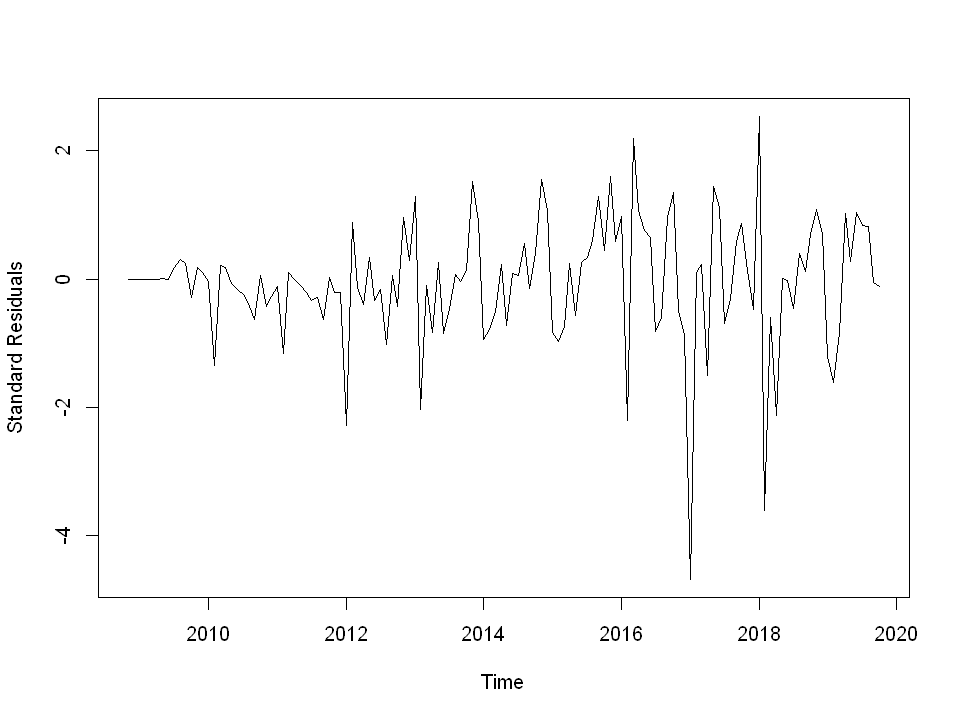

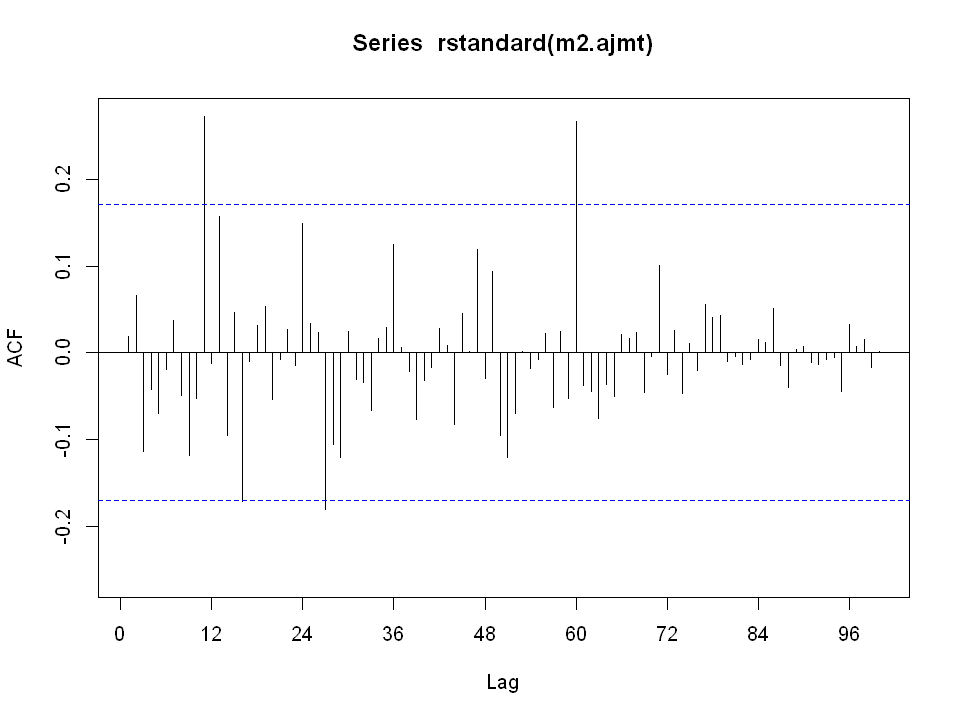

In [27]:
library(TSA)
plot(rstandard(m2.ajmt),ylab="Standard Residuals")
Acf(rstandard(m2.ajmt),lag.max=100)

The residual series is stationary and the ACF values decay rapidly within the boundary(except for order 12 and 60).

In [28]:
##dw statistic
dw=sum(diff(rstandard(m2.ajmt))^2)/sum(rstandard(m2.ajmt)^2)
dw

[1] 1.95872

Its value is close to 2, the model residuals have no significant first-order autocorrelation. 

In [29]:
##Ljung-Box statistic
for(i in 1:3)
  print(Box.test(rstandard(m2.ajmt),type = c("Ljung-Box"),lag=6*i))


	Box-Ljung test

data:  rstandard(m2.ajmt)
X-squared = 3.3997, df = 6, p-value = 0.7573


	Box-Ljung test

data:  rstandard(m2.ajmt)
X-squared = 17.206, df = 12, p-value = 0.142


	Box-Ljung test

data:  rstandard(m2.ajmt)
X-squared = 27.258, df = 18, p-value = 0.07427



The DW test and the LB test show that the first and higher order residuals are uncorrelated, so the residuals are uncorrelated. 

**Observing the performance of the residuals of the above two models, the second model does effectively extract all the information in the residuals, while some information remains in the residuals of the first model.
Therefore, SARIMA(0,1,1)×(3,1,0)6 is a better choice.**

#### (3) Further diagnosis

- Check the normality of residuals 

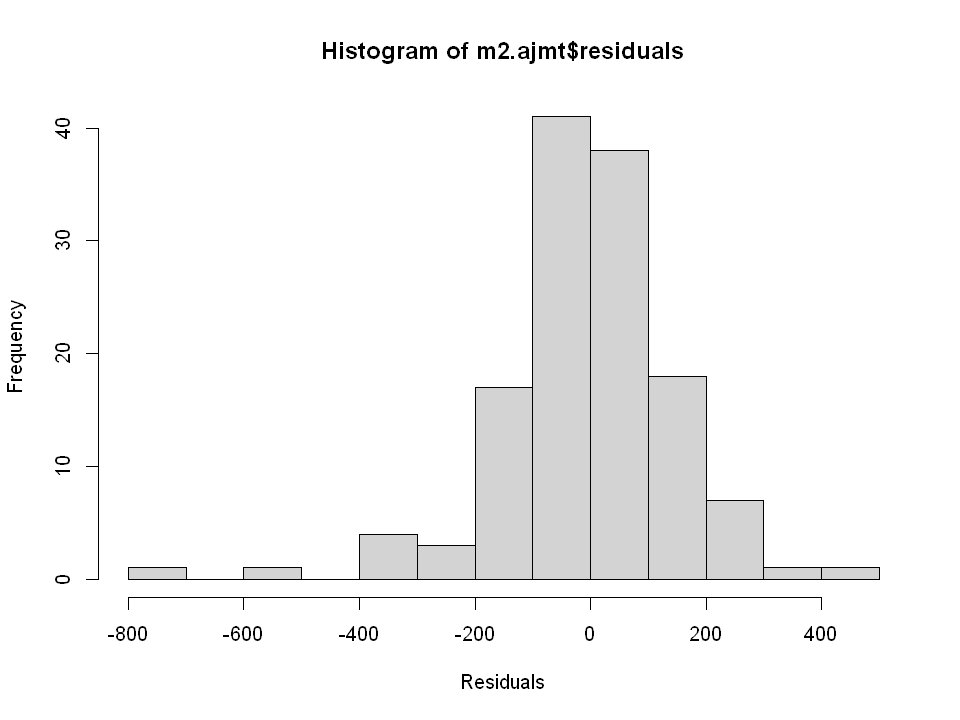


	Shapiro-Wilk normality test

data:  rstandard(m2.ajmt)
W = 0.91799, p-value = 6.701e-07


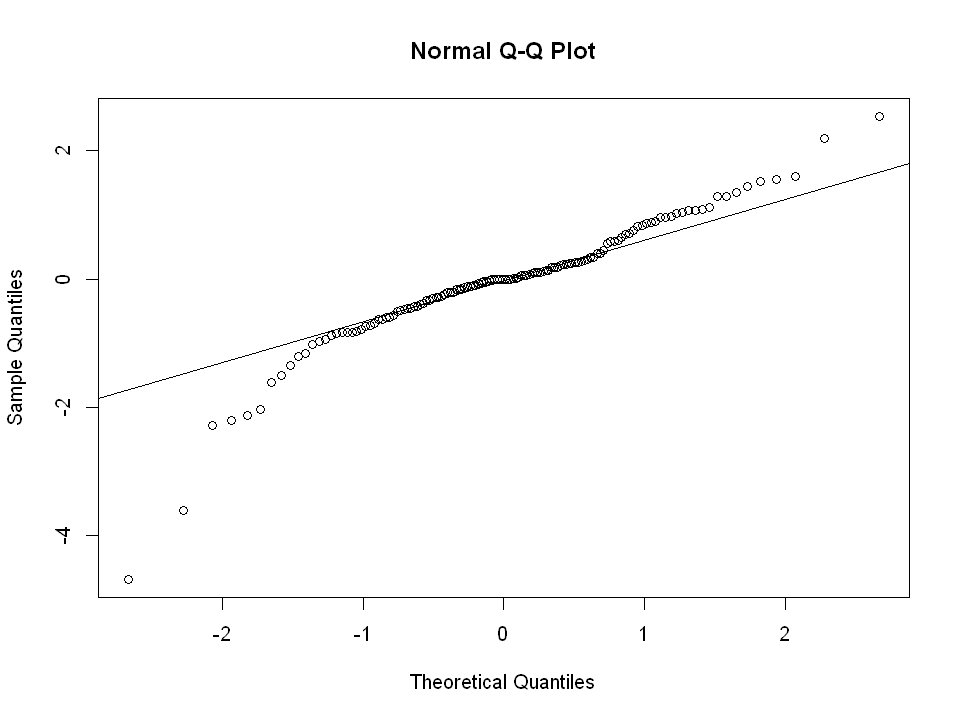

In [30]:
#histogram
hist(m2.ajmt$residuals,xlab="Residuals")
#QQ plot
qqnorm(rstandard(m2.ajmt))
qqline(rstandard(m2.ajmt))
##Shapiro-Wilk normality test
shapiro.test(rstandard(m2.ajmt))

First check the normality of the residuals. The residual histogram is an asymmetric. QQ plot shows the residuals is not normal.  W test with a small p-value indicating that the residuals is not normal. Therefore, it can be considered that the model residuals are not normal.   
In summary, the model residuals are independent of each other, pass the white noise test, but the residuals are not normal. 

- Plot the fitted line

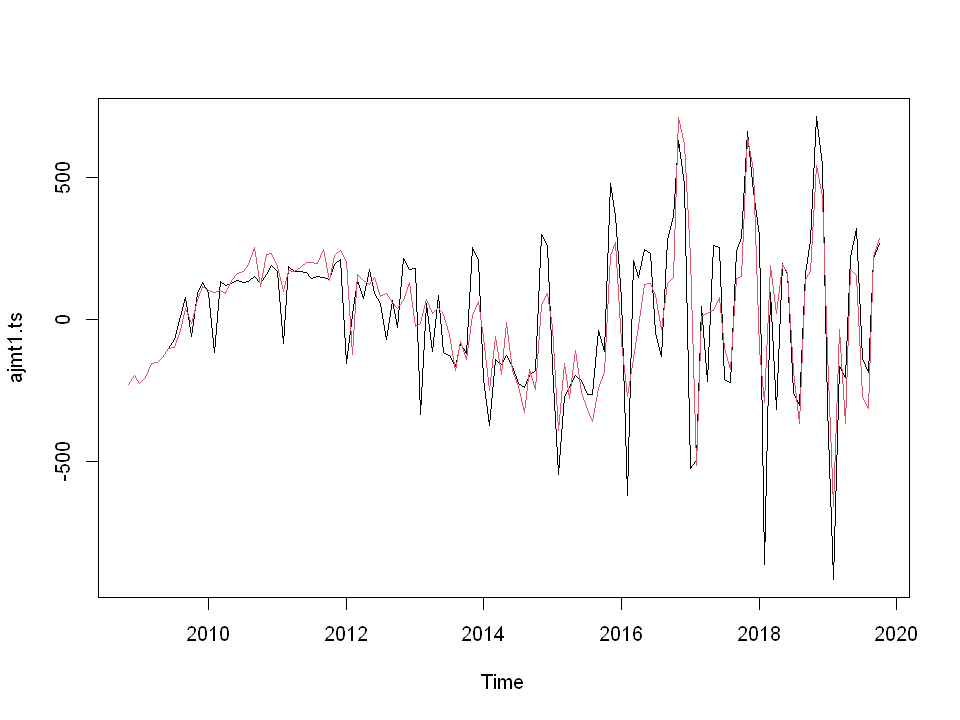

In [31]:
plot(ajmt1.ts)
par(new=T)
lines(fitted(m2.ajmt),col=2)

In [32]:
#Evaluate fitting performance 
library(Metrics)
rmse(ajmt1.ts,fitted(m2.ajmt))#RMSE
mae(ajmt1.ts,fitted(m2.ajmt))#MAE
mape(ajmt1.ts,fitted(m2.ajmt))#MAPE


Attaching package: 'Metrics'


The following object is masked from 'package:forecast':

    accuracy




[1] 151.6239

[1] 102.3003

[1] 0.6490096

#### (4) Model selection - other possible models

##### Check if the model is overfitting - SARIMA (0,1,1)×(2,1,0)6

Because we directly changed the seasonal autoregressive order from 1 to 3, although a model with better performance is obtained, it is also necessary to consider whether the model is overfitting. Therefore, I would set up SARIMA (0,1,1)×(2,1,0)6 model and compared with the original model from several dimensions. 

In [33]:
m3.ajmt=Arima(ajmt1.ts,order=c(0,1,1),seasonal=list(order=c(2,1,0),period=6),method="ML")
m3.ajmt

Series: ajmt1.ts 
ARIMA(0,1,1)(2,1,0)[6] 

Coefficients:
          ma1     sar1     sar2
      -0.7242  -0.8697  -0.0763
s.e.   0.0744   0.0880   0.0923

sigma^2 = 32123:  log likelihood = -828.13
AIC=1664.27   AICc=1664.6   BIC=1675.58

The sar2 parameter is not significantly non-zero.

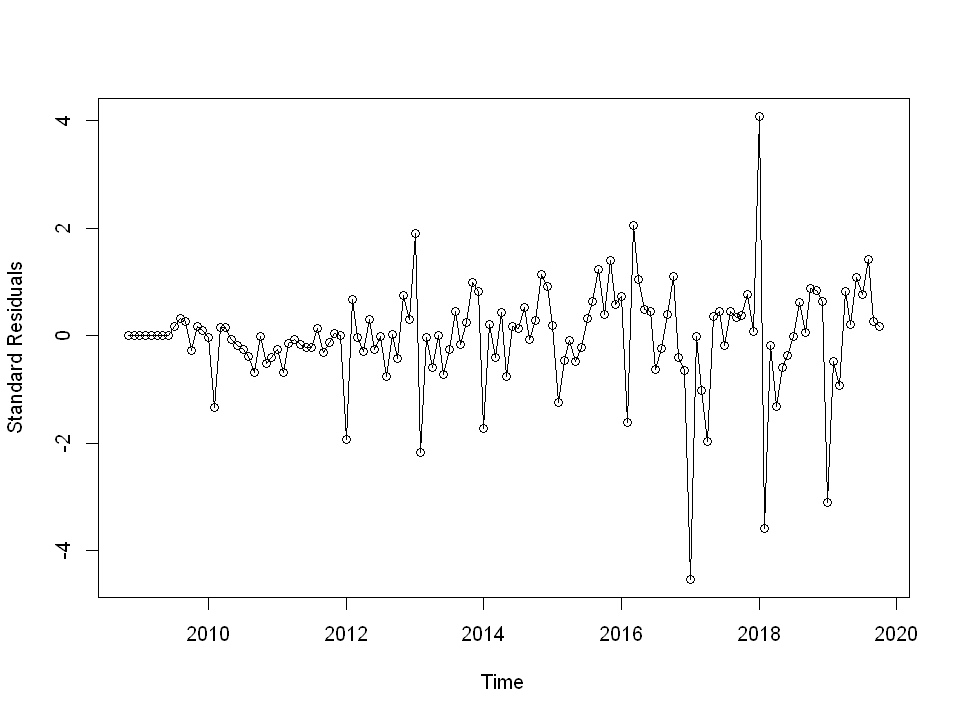


	Box-Ljung test

data:  rstandard(m3.ajmt)
X-squared = 8.2333, df = 6, p-value = 0.2215


	Box-Ljung test

data:  rstandard(m3.ajmt)
X-squared = 34.339, df = 12, p-value = 0.0005962


	Box-Ljung test

data:  rstandard(m3.ajmt)
X-squared = 46.984, df = 18, p-value = 0.0002128



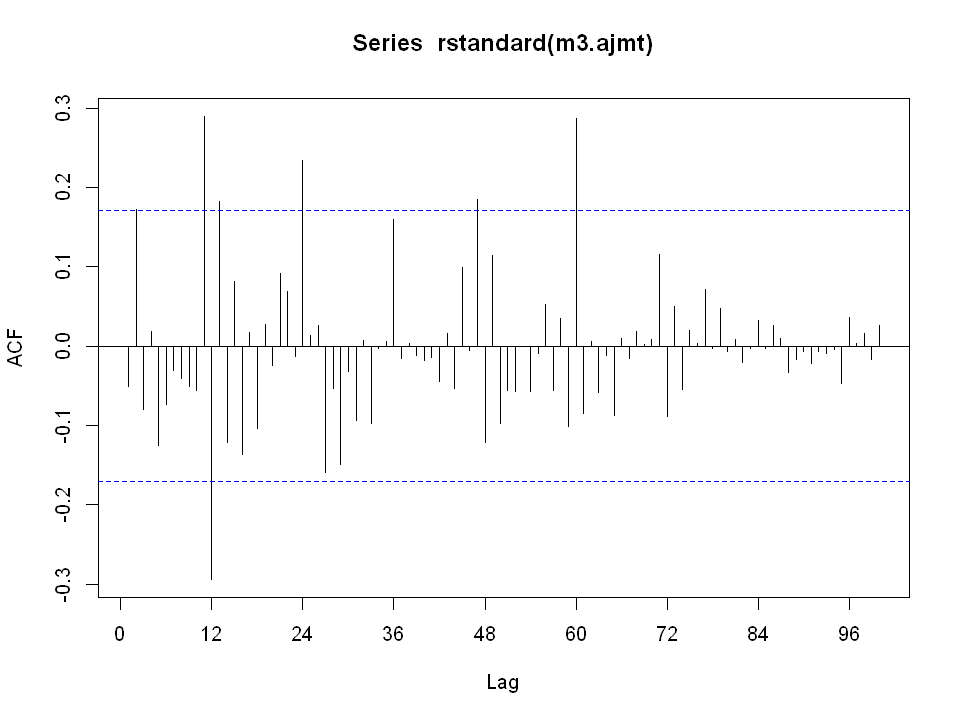

In [34]:
library(TSA)
plot(rstandard(m3.ajmt),ylab="Standard Residuals",type="o")
Acf(rstandard(m3.ajmt),lag.max=100)
for(i in 1:3)
  print(Box.test(rstandard(m3.ajmt),type = c("Ljung-Box"),lag=6*i))

Similar performance.

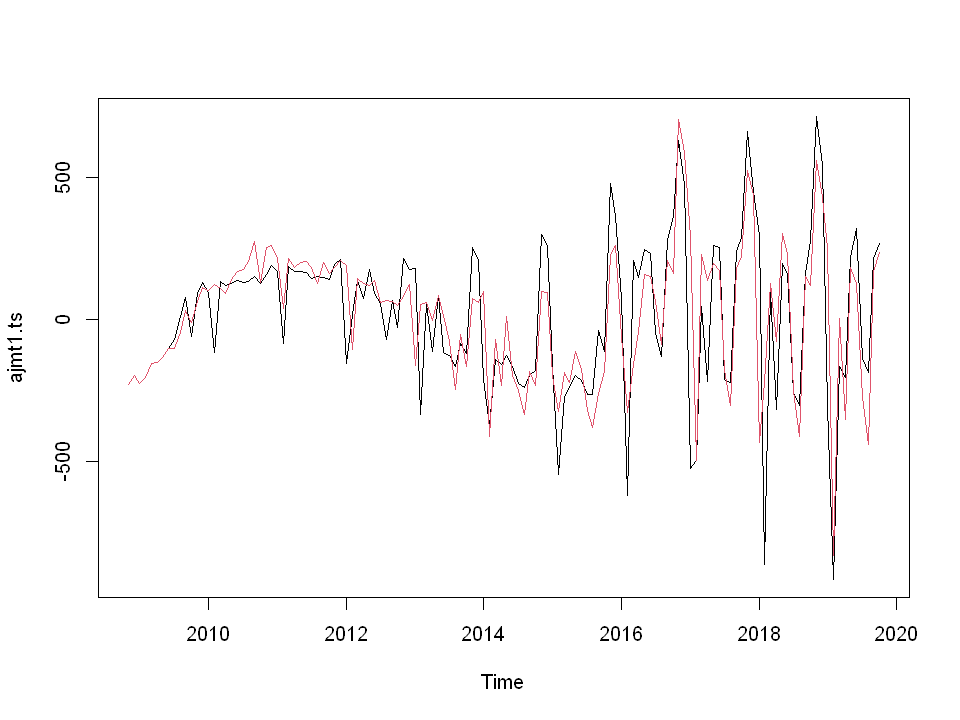

In [35]:
plot(ajmt1.ts)
par(new=T)
lines(fitted(m3.ajmt),col=2)

In [36]:
#Evaluate fitting performance 
library(Metrics)
rmse(ajmt1.ts,fitted(m2.ajmt))#RMSE
mae(ajmt1.ts,fitted(m2.ajmt))#MAE
mape(ajmt1.ts,fitted(m2.ajmt))#MAPE

[1] 151.6239

[1] 102.3003

[1] 0.6490096

The metrics are a little worse than the SARIMA(0,1,1)×(3,1,0)6 model.


	Shapiro-Wilk normality test

data:  rstandard(m2.ajmt)
W = 0.91799, p-value = 6.701e-07


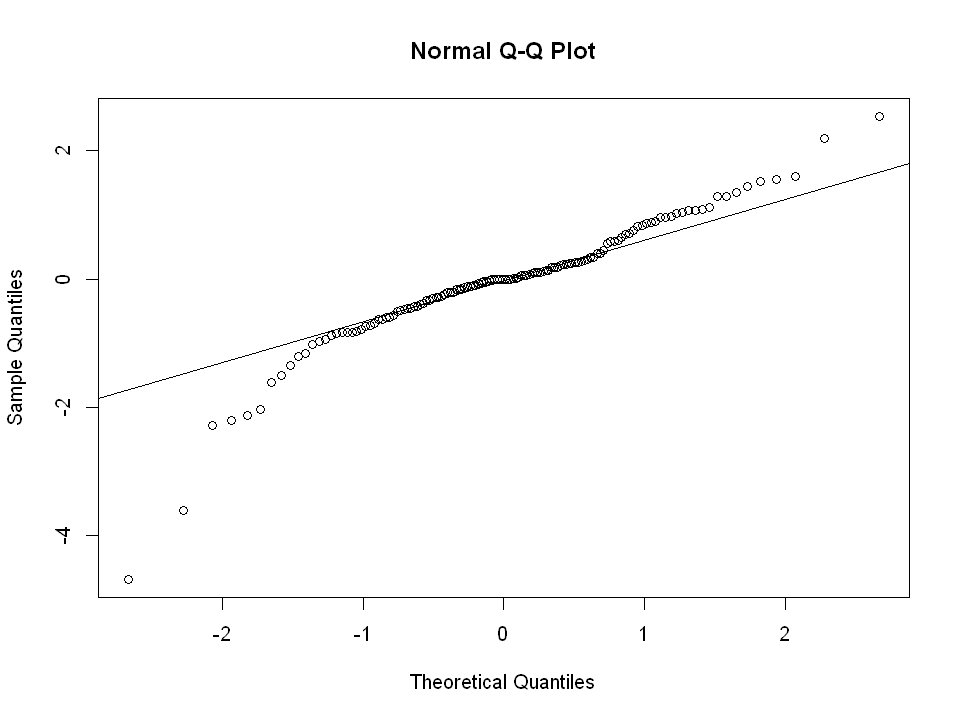

In [37]:
qqnorm(rstandard(m2.ajmt))
qqline(rstandard(m2.ajmt))
shapiro.test(rstandard(m2.ajmt))

##### Try SARIMA (0,1,2)×(2,1,0)6 and (2,1,1)×(3,1,0)6

Also try "overfit" the model in both directions. When considering the direction of overfitting, follow the direction implied by the ACF and PACF of the original model, the seasonal order is very clear, but the non-seasonal order is ambiguous (both are censored), so we consider attempts in two directions. 

Series: ajmt1.ts 
ARIMA(0,1,2)(3,1,0)[6] 

Coefficients:
          ma1      ma2     sar1     sar2     sar3
      -0.6467  -0.0339  -0.9015  -0.4897  -0.4851
s.e.   0.0886   0.0852   0.0780   0.1075   0.0834

sigma^2 = 25245:  log likelihood = -814.42
AIC=1640.85   AICc=1641.56   BIC=1657.82

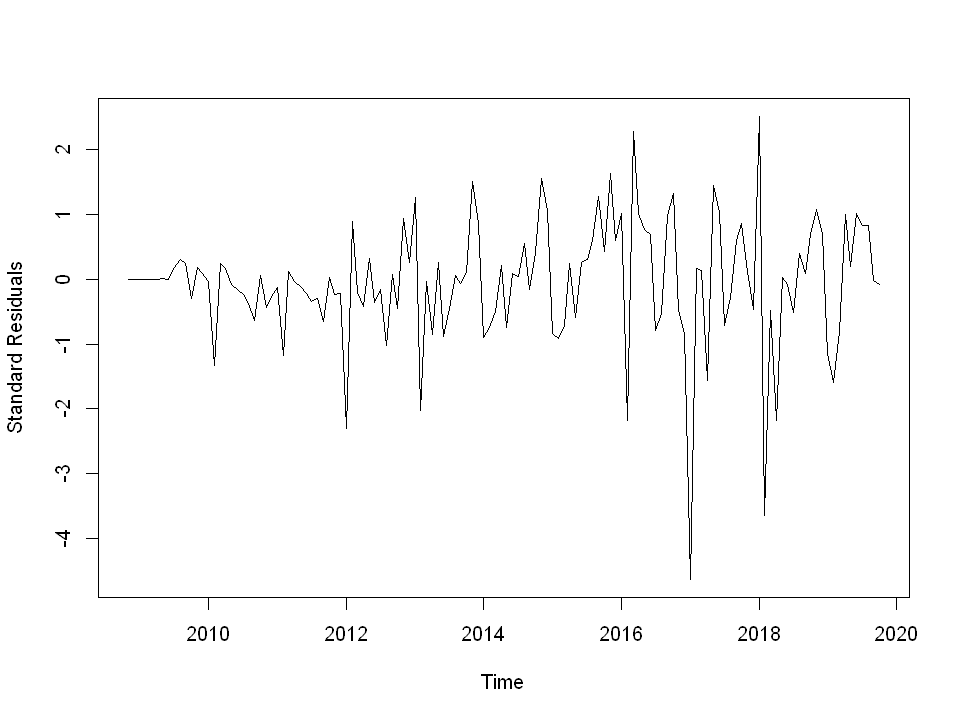


	Box-Ljung test

data:  rstandard(m4.ajmt)
X-squared = 3.2315, df = 6, p-value = 0.7793


	Box-Ljung test

data:  rstandard(m4.ajmt)
X-squared = 16.772, df = 12, p-value = 0.1584


	Box-Ljung test

data:  rstandard(m4.ajmt)
X-squared = 27.228, df = 18, p-value = 0.07481



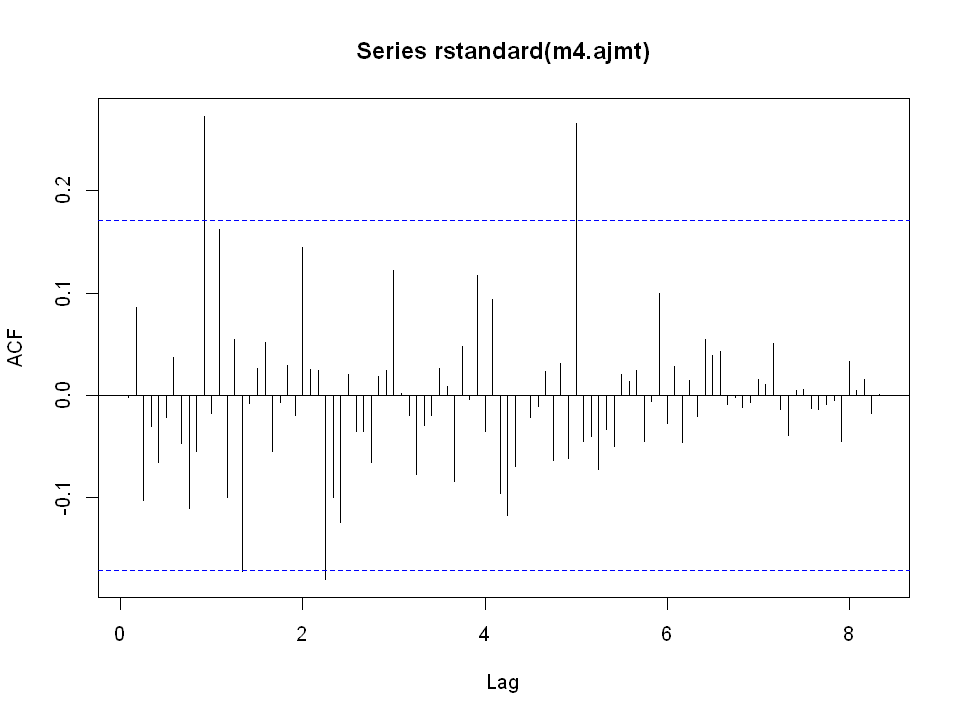


	Shapiro-Wilk normality test

data:  rstandard(m4.ajmt)
W = 0.91609, p-value = 5.159e-07


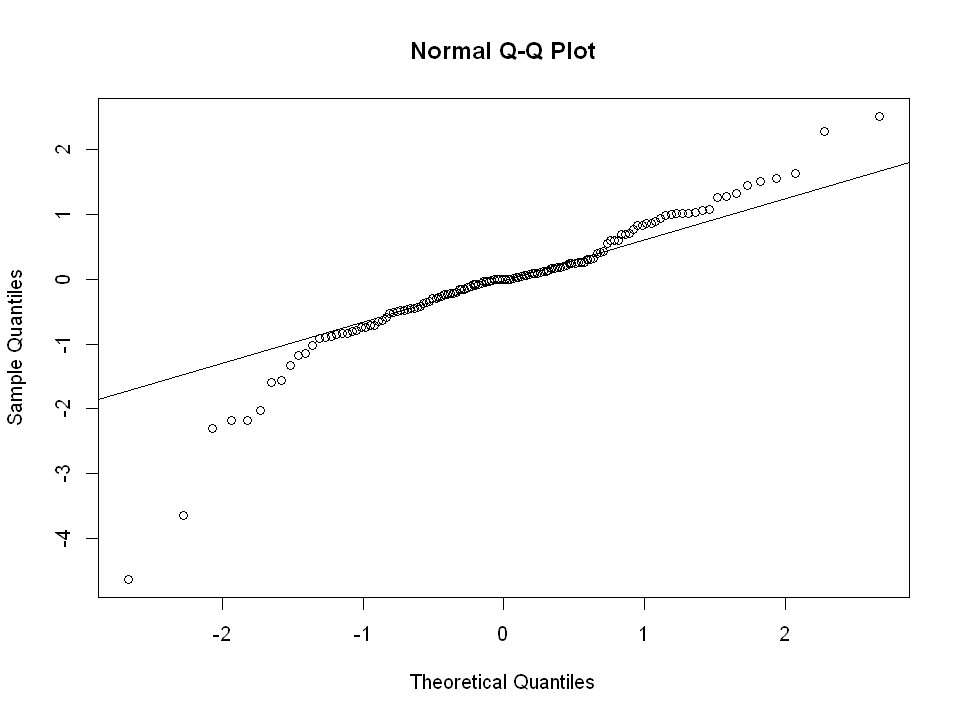

[1] 151.4931

[1] 101.9577

[1] 0.6474298

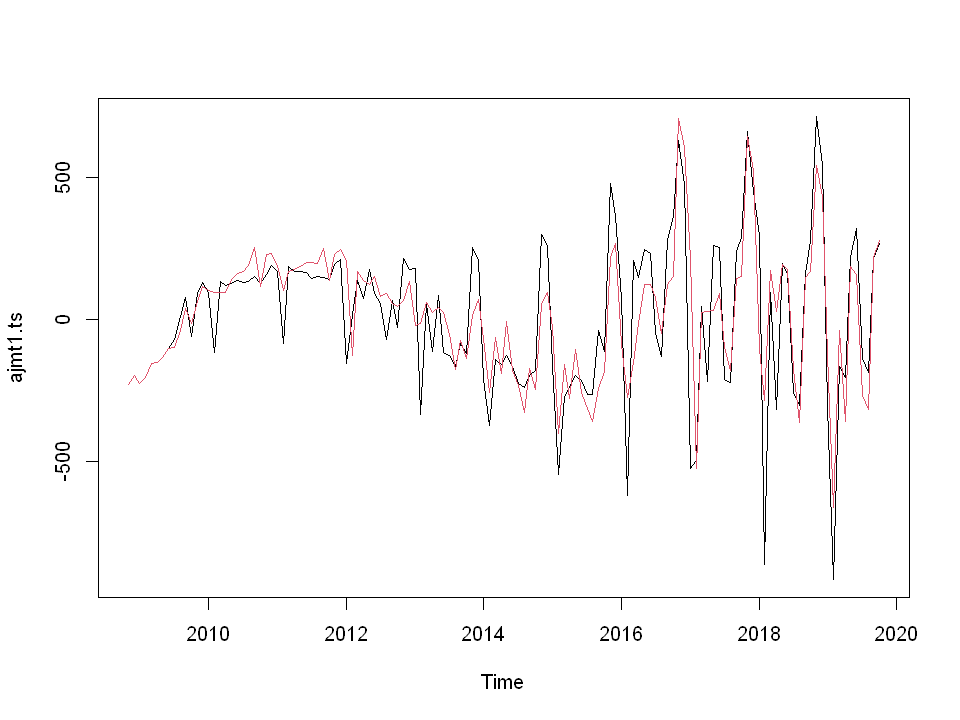

In [38]:
#SARIMA (0,1,2)*(3,1,0)s
m4.ajmt=Arima(ajmt1.ts,order=c(0,1,2),seasonal=list(order=c(3,1,0),period=6),method="ML")
m4.ajmt

library(TSA)
plot(rstandard(m4.ajmt),ylab="Standard Residuals")
acf(rstandard(m4.ajmt),lag.max=100)

#residual correlation test - passed
for(i in 1:3)
  print(Box.test(rstandard(m4.ajmt),type = c("Ljung-Box"),lag=6*i))

#check residual normality - not normal
qqnorm(rstandard(m4.ajmt))
qqline(rstandard(m4.ajmt))
shapiro.test(rstandard(m4.ajmt)) 

#the fitted line
plot(ajmt1.ts)
par(new=T)
lines(fitted(m4.ajmt),col=2)

#fitting performance
rmse(ajmt1.ts,fitted(m4.ajmt))#RMSE
mae(ajmt1.ts,fitted(m4.ajmt))#MAE 
mape(ajmt1.ts,fitted(m4.ajmt))#MAPE

Series: ajmt1.ts 
ARIMA(2,1,1)(3,1,0)[6] 

Coefficients:
         ar1    ar2      ma1     sar1     sar2     sar3
      0.1648  0.158  -0.8148  -0.8851  -0.4650  -0.4633
s.e.  0.1400  0.118   0.1006   0.0817   0.1115   0.0864

sigma^2 = 25189:  log likelihood = -813.48
AIC=1640.96   AICc=1641.92   BIC=1660.76

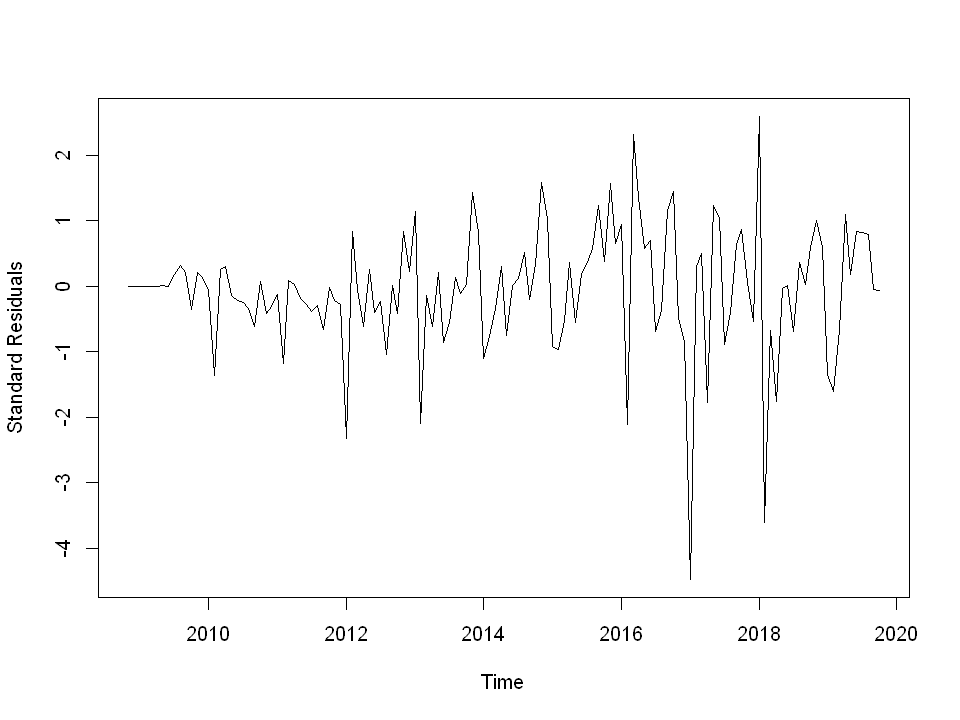


	Box-Ljung test

data:  rstandard(m5.ajmt)
X-squared = 0.71503, df = 6, p-value = 0.9942


	Box-Ljung test

data:  rstandard(m5.ajmt)
X-squared = 15.215, df = 12, p-value = 0.2299


	Box-Ljung test

data:  rstandard(m5.ajmt)
X-squared = 23.067, df = 18, p-value = 0.188



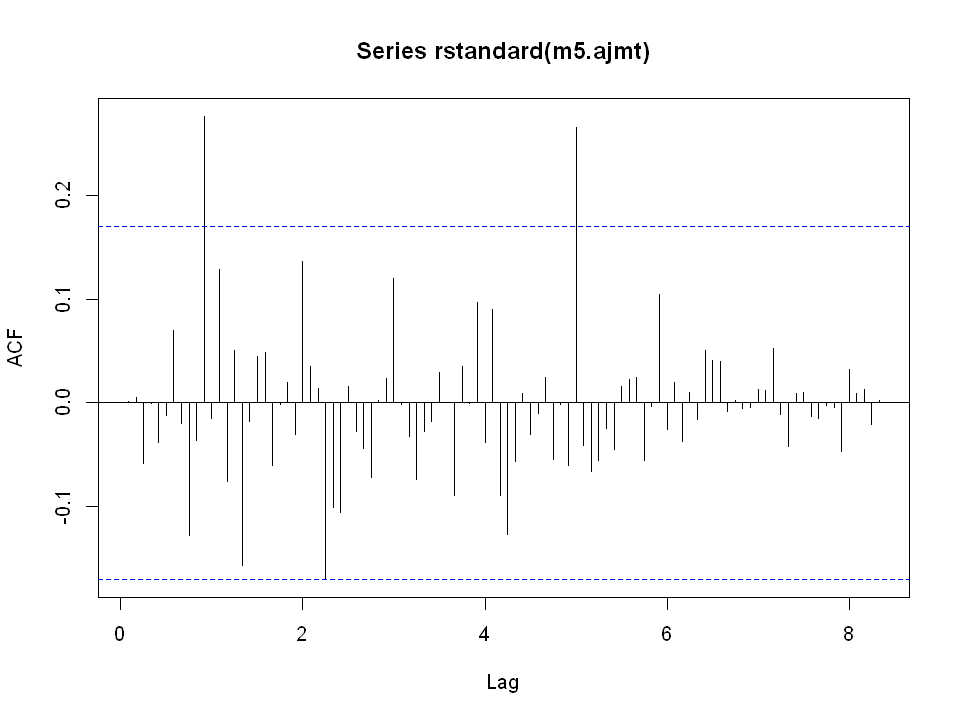


	Shapiro-Wilk normality test

data:  rstandard(m5.ajmt)
W = 0.926, p-value = 2.088e-06


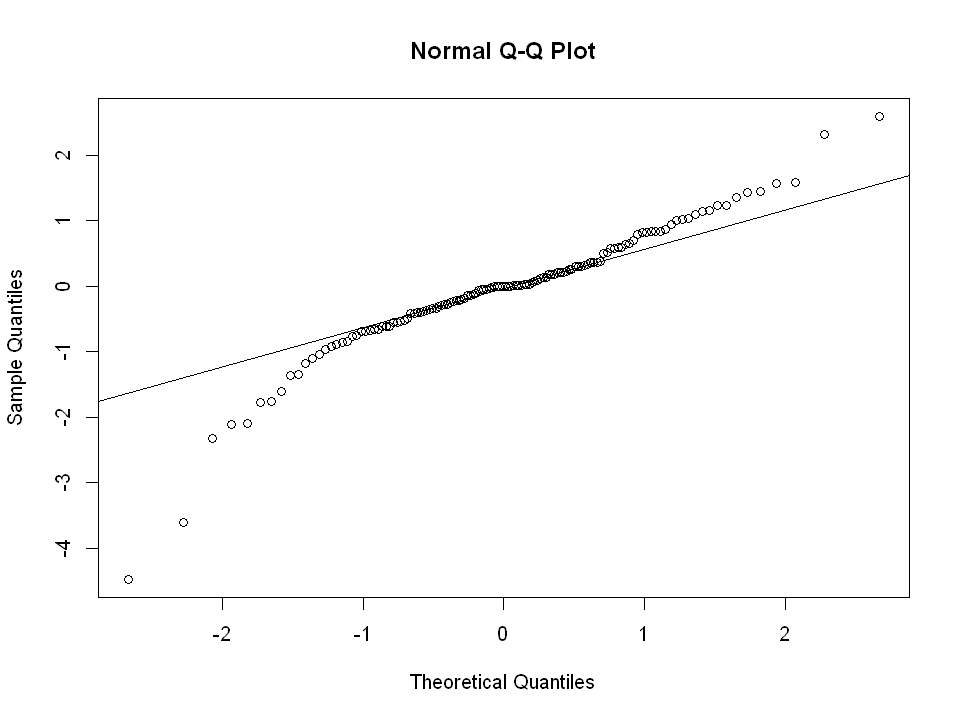

[1] 150.6934

[1] 102.5579

[1] 0.6575761

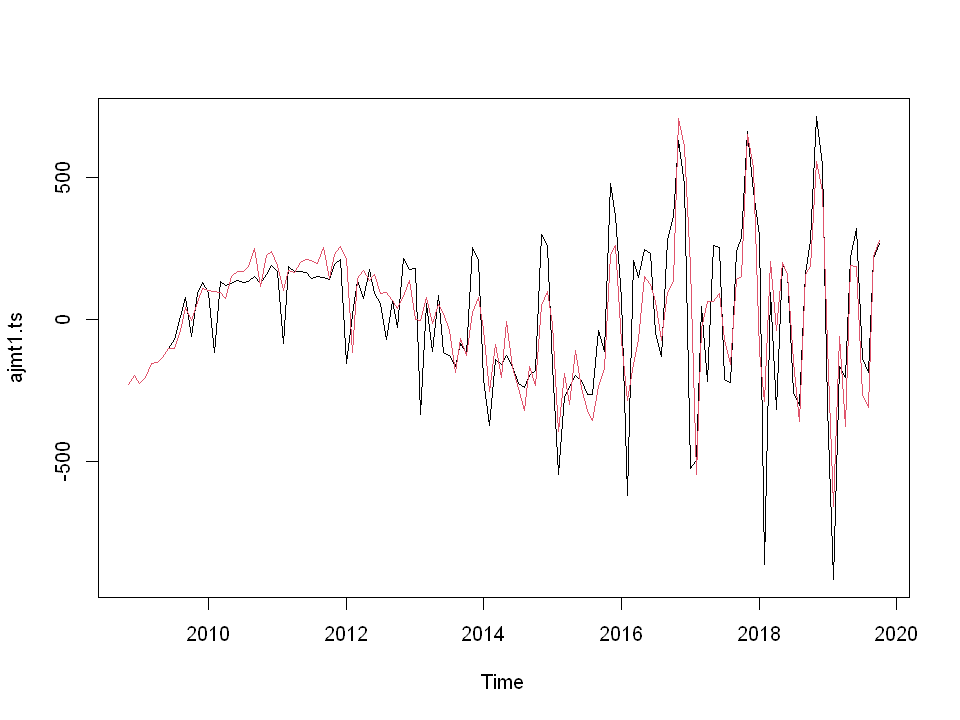

In [39]:
#SARIMA (2,1,1)*(3,1,0)
m5.ajmt=Arima(ajmt1.ts,order=c(2,1,1),seasonal=list(order=c(3,1,0),period=6))
m5.ajmt

library(TSA)
plot(rstandard(m5.ajmt),ylab="Standard Residuals")
acf(rstandard(m5.ajmt),lag.max=100)

#residual correlation test - passed
for(i in 1:3)
  print(Box.test(rstandard(m5.ajmt),type = c("Ljung-Box"),lag=6*i))

#check residual normality - not normal
qqnorm(rstandard(m5.ajmt))
qqline(rstandard(m5.ajmt))
shapiro.test(rstandard(m5.ajmt))

#the fitted line
plot(ajmt1.ts)
par(new=T)
lines(fitted(m5.ajmt),col=2)

#fitting performance
rmse(ajmt1.ts,fitted(m5.ajmt))#RMSE
mae(ajmt1.ts,fitted(m5.ajmt))#MAE
mape(ajmt1.ts,fitted(m5.ajmt))#MAPE

Compare the fitting performance of all models, as shown in the figure below, the fitting performance is measured by three indicators: MAPE, RMSE, MAE, we can see the effect of SARIMA(0,1,1) × (2,1,0)6 model is poorer, other models are not much different. 

<div>
<img src="img/1.png" width="800"/>
</div>

From the fitted indicators, the effects of the four models are not very different. Therefore, we have reason to support the original model SARIMA(0,1,1)×(3,1,0)6. 

<div>
<img src="img/2.png" width="800"/>
</div>

## 6. Prediction

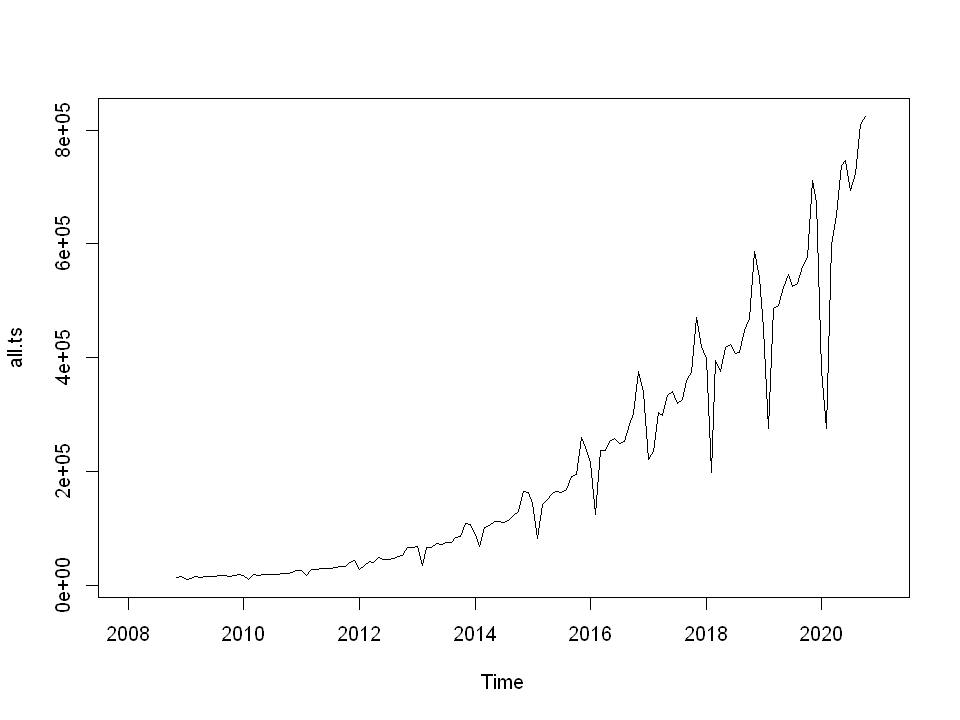

In [40]:
library(forecast)
#all the data
all<-read.csv("data2.csv",sep=",")
all.ts=ts(all$Count,frequency=12,start=c(2008,11))
plot(all.ts,xlim=c(2008,2021))

#The last year (for prediction)
new.ts=ts(df_pre$Count,frequency=12,start=c(2019,11))

In [41]:
#Predicted values
new.fc<-forecast(m2.ajmt,h=12)

#Converted to predicted value of original data
##box-cox inverse transform 
InvBoxCox_pre<-InvBoxCox(new.fc$mean,0.5)

#plus quadratic trend fit values
t=133:144
t2=t^2
fitnum<--1468.583*t+41.552*t2+27339.888

#Convert forecast values to time series format 
new.pre=ts(InvBoxCox_pre+fitnum,frequency=12,start=c(2019,11))

In [42]:
#Convert fitted values to source data 
InvBoxCox_fit<-InvBoxCox(fitted(m2.ajmt),0.5)
t=1:132
t2=t^2
fitnum2<--1468.583*t+41.552*t2+27339.888

#Convert fitted values to time series format 
fit.pre<-ts(InvBoxCox_fit+fitnum2,frequency=12,start=c(2008,11))

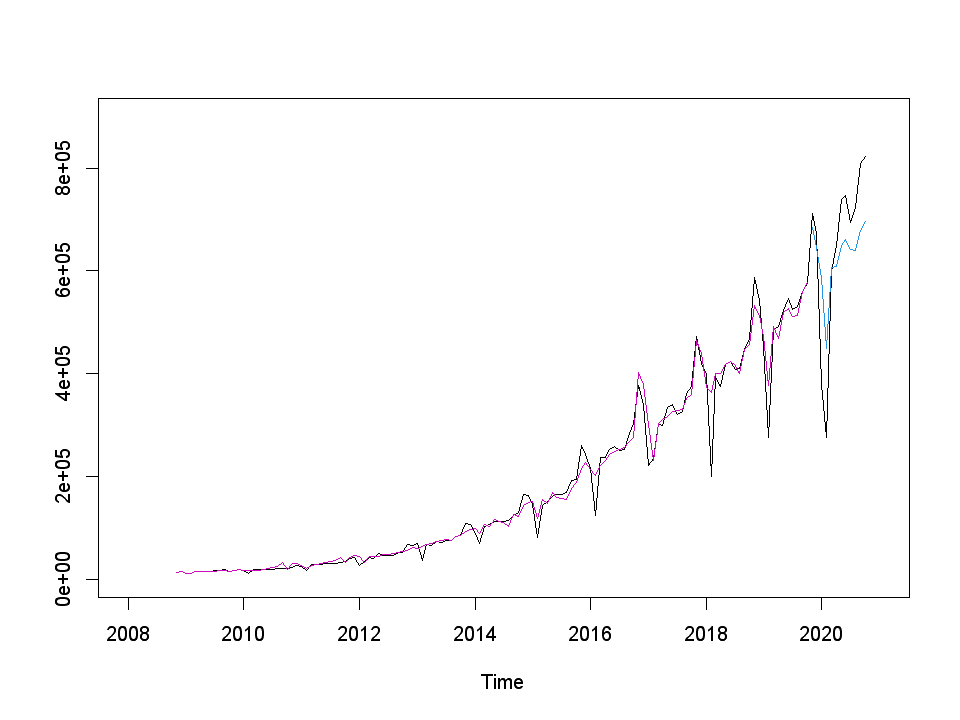

In [43]:
#Plot the real data
plot(all.ts,ylab="",xlim=c(2008,2021),ylim=c(0,9*10^5))
#Plot the fitted values (pink) 
par(new=T)
plot(fit.pre,col=6,ylab="",xlim=c(2008,2021),ylim=c(0,9*10^5))
#Plot predicted values (blue) 
par(new=T)
plot(new.pre,col=4,ylab="",xlim=c(2008,2021),ylim=c(0,9*10^5))

In [ ]:
new.pre

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,,,,,,,,,,,685125.5,645572.4
2020,586902.0,448264.6,606545.5,609460.3,649035.8,660652.6,642146.3,640598.9,678907.8,696670.0,,


In [ ]:
new.ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2019,,,,,,,,,,,712424.1,673425.7
2020,378096.8,276521.4,598423.1,649726.4,738292.5,746967.5,693601.4,723622.1,809158.2,823388.0,,


From the prediction, the model obviously captures the cycles perfectly, and it also captures most of the volatility.   
Since it was all 1-2 small peaks + 1 higher peak, our model also captures this pattern well - the first high peak coincides perfectly.    
For the last part of the trend, it's just that the express delivery volume in 2020 has increased significantly, which does not obey this law.     
Can we set up another model to deal with this part?

## 7. The year 2020...

It is clear from the previous time series graph that the volume of express delivery has grown rapidly since 2020. I separately took out the express volume of the data in the last year (November 2019 and October 2020), and made a analysis of the data.  
As can be seen from the figure, the lowest point was reached in February 2020, and after that, there was a rapidly rising nonlinear trend, so I tried to fit a quadratic curve for this part of the fast-growing data after February.   

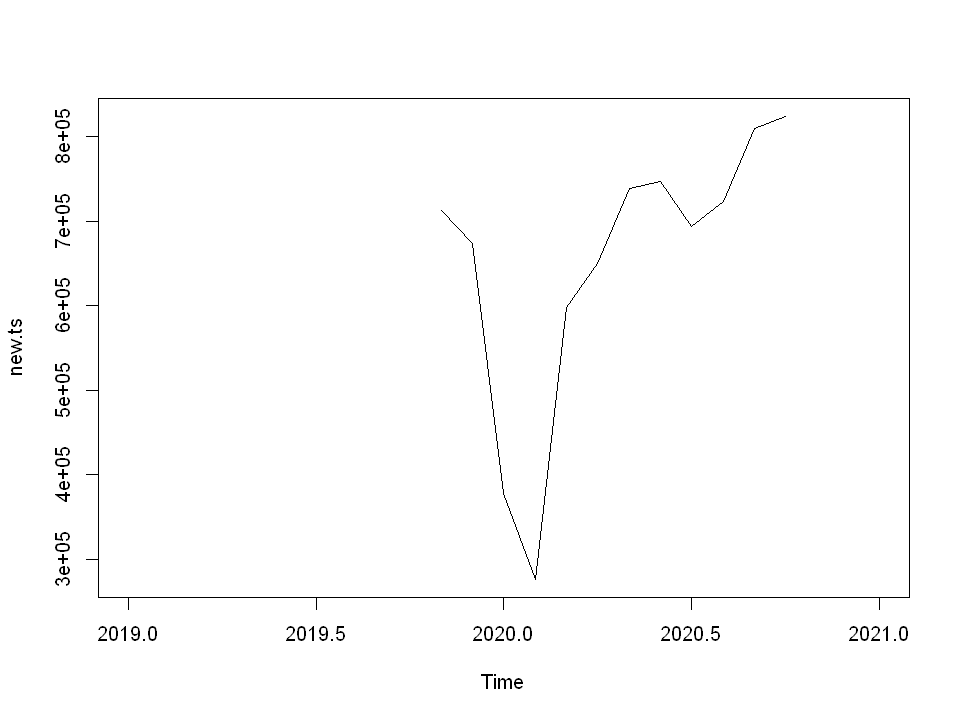


Call:
lm(formula = new$Count[4:12] ~ t + t2)

Residuals:
    Min      1Q  Median      3Q     Max 
-104778  -74861   14007   52386   95549 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   238906     105731   2.260   0.0646 .
t             152802      48547   3.147   0.0199 *
t2            -10409       4735  -2.198   0.0703 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 83090 on 6 degrees of freedom
Multiple R-squared:  0.8092,	Adjusted R-squared:  0.7457 
F-statistic: 12.73 on 2 and 6 DF,  p-value: 0.006942


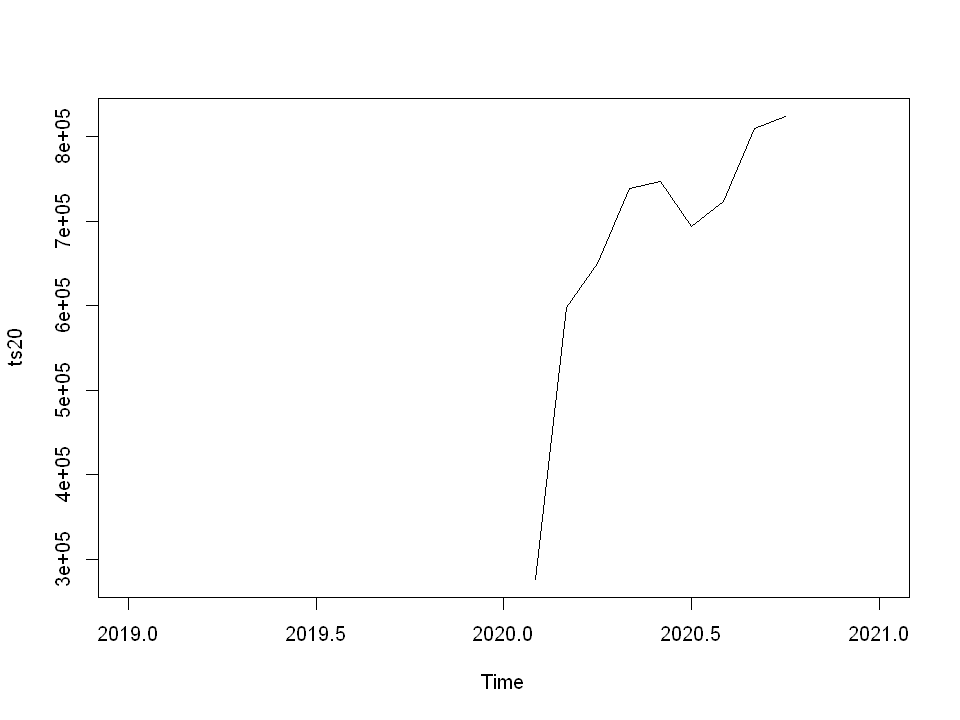

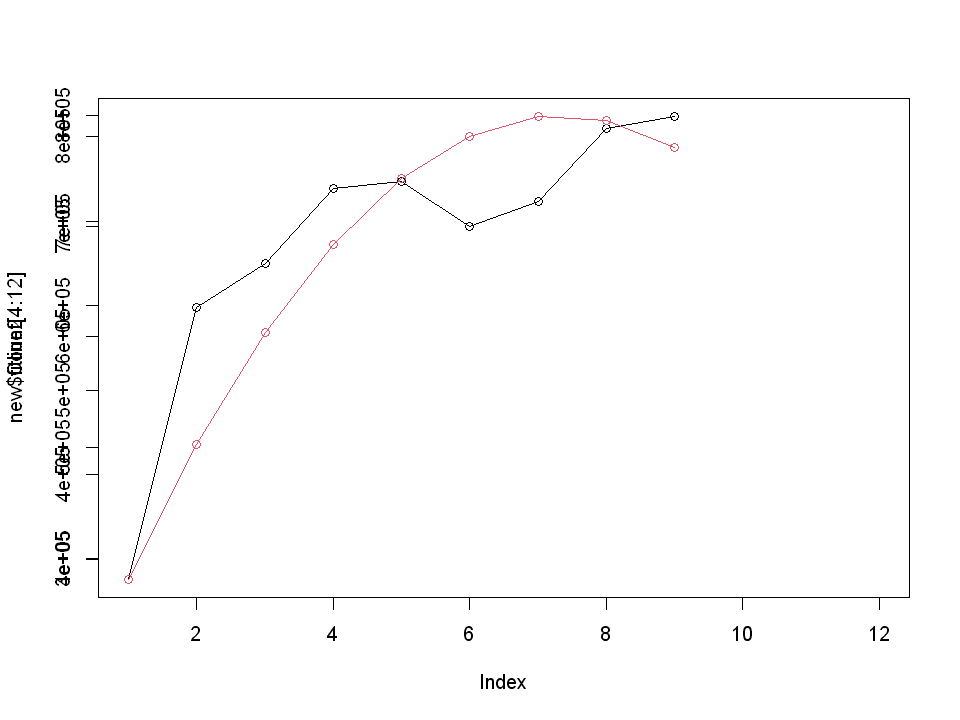

In [138]:
#The last period
new<-df_pre
new.ts=ts(new$Count,frequency=12,start=c(2019,11))
plot(new.ts,xlim=c(2019,2021))
#The increasing from Feb 2020
ts20=ts(new$Count[4:12],frequency=12,start=c(2020,2))
plot(ts20,xlim=c(2019,2021))
#quadratic fit
t=1:9
t2=t^2
fit2=lm(new$Count[4:12]~t+t2)
summary(fit2)
fitline2<--10409*t2+152802*t+238906 
plot(new$Count[4:12],xlim=c(1,12),type="o")
par(new=T)
plot(fitline2,col=2,xlim=c(1,12),type="o")

## 7. Summary

- There is indeed a periodic pattern in the volume of postal express delivery. May is a small peak every year, November is a huge peak, and February may indeed be a valley due to the Spring Festival holiday. In addition, in the past ten years, the express delivery volume has shown a quadratic growth. After detrending, I fit a SARIMA model to the variance-stabilized transformed data, which nicely reflects this information in the process.  
- In addition, I also analyzed the fast growth of express delivery during the COVID-19 period, and consulted background materials to explore the reasons for its growth. The rapid growth of data in 2020 presents a non-linear quadratic form, showing that the postal express industry has undertaken relatively important work during the COVID epidemic.   